# **Plant Disease Detection using Few-Shot Learning with Siamese Networks, Triplet Loss & Optimized Transfer Learning**

---



---
To ensure sustainable agriculture by mitigating crop losses, requires effective detection of plant pathogens, particularly in remote areas with limited resources. Traditional deep learning models, which demand extensive datasets and computational power, are unsuitable for deployment on IoT devices like mobile phones.

The aim of this project is to develop a model that is efficient and capable of producing high levels of accuracy in plant disease detection, despite being constrained by low computational resources and limited data. To this end, the dataset that will be used to investigate if it is possible to create such a model is  [PlantVillage](https://www.kaggle.com/datasets/emmarex/plantdisease), which contains 20,638 images that have been taken in a controlled environment, namely, plants photographed with good lighting possessing minimal noise/interference from unwanted intrusions. Thus the goal is to obtain a reasonable level of predictive accuracy that suggests that the model can distinguish between whether a plant is healthy or not and have the possibility of not being restricted to the controlled conditions.

The ultimate objective is to create a scalable solution that bridges the gap between real-world usability and advanced detection techniques. By leveraging Few-Shot Learning (FSL), this project hopes to provide a robust approach to plant disease detection, focusing on models optimized for IoT platforms.

Key techniques include:

* Siamese Networks with Triplet Loss for efficient comparison-based learning.
* Random Search and Bayesian Optimization for hyperparameter-tuning.
* FSL within a 2-way, 5-shot framework to perform well on limited datasets.

Two stages will be implemented to develop two models:

**Stage 1 - Baseline Model (BLM)**: A foundational transfer learning model that will harness random search to obtain the optimal combination of hyperparameters. The results will provide the initial architectural conditions that will be placed on the next stage model development.

**Stage 2 - Few-Shot Learning Model (FSLM)**: Again a foundational transfer learning model will leverage the following advance techniques:
* Training the network using a Siamese Network setup with a triplet loss function that embraces the hyperparameters that were optimally generated in the previous stage.
* Hyperparameter-tuning using Bayesian optimization. The input for exploration/exploitation will come from three notable hyperparameters that are specific to Bayesian optimization and a component pertaining to the regularizer.
* Testing using a FSL environment.

# **Stage 1 - BLM**
---
---


This stage involves several critical phases:

1. Data Preparation
2. Training the BLM
3. Hyperparameter-Tuning with Random Search
4. Testing on Unseen Data

## **1. Data Preparation**
The data comprises two prominent classes which are contained in 15 different plant categories; healthy and unhealthy. When viewed as two binary classes, it becomes apparent that the data is highly imbalanced with the healthy class being in the minority. There are several objectives for this phase to been successful.
* Divide the total database into two equal portions, where each portion has the same number of target variables as the other.
* A further distribution of the binary classes is required for both Stage 1 and Stage 2, resulting in each stage having three subsets:
    * Train set (70%)
    * Validation set (20%)
    * Test set (10%)

## **2. Training the BLM**
[MobileNetV2](https://arxiv.org/abs/1801.04381) is a transfer learning model which was originally trained on the [ImageNet](https://image-net.org) database.

In order to not over complicate the classification problem, the BLM is tasked with classifying whether a plant leaf is either Healthy or Unhealthy.

Training MobileNetV2 involves backpropagation and  gradient descent by employing a binary cross-entropy loss and a sigmoid-activated logistic classifier, thus refining the model's architecture for optimal performance.
* The Logistic Classifier: The classifier will accompany the binary cross-entropy loss function.
$$\mathbb{P}(y=1|x)=\frac{1}{1 + e^{-(w^Tx+b)}}$$

* The Binary Cross-Entropy (BCE) Loss Function: The binary cross-entropy loss function aids in the minimization of the difference between the predicted $i^{th}$ probability $\mathbb{P}_i$ and the $i^{th}$ label $y_i$.
$$\mathscr{L}_{BCE}= -\frac{1}{N}\sum^N_{i=1}\left[ y_i \text{ log }(\mathbb{P}_i) + (1-y_i) \text{ log }(1-\mathbb{P}_i) \right]$$

* $L_2$ Regularizer: This will be attached to the loss function in the hope that it will mitigate any overfitting issues by penalizing large weights. The $\lambda$ regularization parameter will not be altered from it's default value of 1.
$$\mathscr{L}_{\text{reg}_2} = \frac{\lambda}{2}||w||^2_2$$

* The three components, $\color{purple}{\text{Logistic Classifier}}$, the $\color{green}{L_2}$ Regularizer and the $\color{orange}{\text{BCE}}$ Loss Function will make-up the Total Loss Function $\mathscr{L}_{\text{Total}}$.

$$\boxed{\boxed{\begin{aligned}\mathscr{L}_{\text{Total}}&= \color{orange}{\mathscr{L}_{\text{BCE}}}+ \color{green}{\mathscr{L}_{\text{reg}_2}} \\ \\ &= \color{orange}{-\frac{1}{N}\sum^N_{i=1}\left[ y_i \text{ log }(\color{purple}{\mathbb{P}_i}) + (1-y_i) \text{ log }(1-\color{purple}{\mathbb{P}_i}) \right]} + \color{green}{\frac{\lambda}{2}||w||^2_2}\end{aligned}}}$$

## **3. Hyperparameter-Tuning with Random Search**
Three hyperparameters will be investigated.
* Width multiplier: $\alpha \in \{0.35, 0.5, 0.75, 1.0\}$
* Learning rate: $\eta \in \{10^{-4},10^{-5},10^{-6}\}$
* Dropout rate: $\mathbb{P} \in \{0.1,0.3, 0.5\}$

## **4. Testing on Unseen Data**
The following metrics will be used and inferences made:

* Matthews Correlation Coefficient (MCC): With binary classification environments, dealing with imbalanced datasets especially during the hyperparameter-tuning and testing phases, using MCC is a more appropriate metric than accuracy. Due to the difficulty that inherently lies in classifying highly imbalanced data, the model should achieve 50% or higher.   $\text{Range } \rightarrow [-1,1]$ where 1 is a perfect prediction, -1 is a complete disagreement between prediction and the observation, and 0 is effectively random guessing.

$$\text{MCC} = \frac{TP \cdot TN - FP \cdot FN}{[(TP + FP)(TP + FN)(TN +FP)(TN +FN)]^{\frac{1}{2}}}$$


* Precision: It should reach 80% or higher on the training set, ensuring that the false positive rates are minimized. This level of Precision will suggest that the model is not overfitting to noise, thereby avoiding an increase in false positives.

$$\text{Precision}= \frac{TP}{TP+FP}$$


* Recall (Sensitivity): The model should achieve a Recall of 80% or higher, which implies that the false negative rates are kept low. At this level it ensures that the models correctly identifies the majority of true cases of plant diseases, demonstrating its ability to recognize disease cases effectively and reducing the risk of underfitting.

$$\color{orange}{\text{Recall} = \frac{TP}{TP+FN}}$$

* F1-Score: The models should achieve an F1-Score of 80% or higher, reflecting a balanced approach to Precision and Recall. This would demonstrate the model's competence in managing the trade-offs between false positives (healthy instead of unhealthy) and false negatives (unhealthy instead of healthy).

$$\text{F1-Score}=2 \cdot \frac{\text{Precision }\cdot \text{ Recall}}{\text{Precision } + \text{ Recall}}$$

Where: TP = True Positive, TN = True Negative, FP = False Positive, and FN = False Negative.

## Investigating the Data

In [ ]:
# -----------------------------------------------------
# Importing Libraries & Mounting Google Drive
# -----------------------------------------------------

import os
import shutil
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
from PIL import Image, UnidentifiedImageError

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -----------------------------------------------------
# Directories & Categories
# -----------------------------------------------------

original_data = '/content/drive/My Drive/PlantVillage'
new_data = '/content/drive/My Drive/dataset'
split_root = '/content/drive/My Drive/split_dataset'  # For the six split datasets

categories = {
    'healthy': ['Pepper_bell_healthy', 'Potato_healthy', 'Tomato_healthy'],
    'unhealthy': ['Tomato_Tomato_YellowLeaf_Curl_Virus', 'Pepper_bell_Bacterial_spot',
                  'Tomato_Septoria_leaf_spot', 'Potato_Early_blight',
                  'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight',
                  'Tomato_Target_Spot', 'Tomato_Leaf_Mold', 'Potato_Late_blight',
                  'Tomato_Bacterial_spot', 'Tomato_Tomato_mosaic_virus',
                  'Tomato_Early_blight']
}

In [ ]:
# =====================================================
# SECTION 1: Investigate Files in the Original Dataset
# =====================================================

def investigate_file_extensions_summary(categories, original_data):

    summary_stats = {}

    for label, sub_dirs in categories.items():

        for sub_dir in sub_dirs:
            sub_path = os.path.join(original_data, sub_dir)

            if not os.path.isdir(sub_path):
                continue

            # Initialize stats for the category
            file_extensions = {}
            non_image_files = []

            for image_name in os.listdir(sub_path):
                img_path = os.path.join(sub_path, image_name)
                _, ext = os.path.splitext(image_name.lower())

                # Update extension count
                file_extensions[ext] = file_extensions.get(ext, 0) + 1

                # Log non-image files
                if ext not in {".jpg", ".jpeg", ".png"}:
                    non_image_files.append(img_path)

            # Store stats for the category
            summary_stats[sub_dir] = {
                "total_files": sum(file_extensions.values()),
                "extensions": file_extensions,
                "non_image_files_count": len(non_image_files),
                "sample_non_image_files": non_image_files[:5],  # Show a sample
            }

    # Print summary statistics
    print("Summary Statistics Per Category:")

    for category, stats in summary_stats.items():
        print(f"\nCategory: {category}")
        print(f"  Total Files: {stats['total_files']}")
        print(f"  Extensions Found: {stats['extensions']}")
        print(f"  Non-Image Files Count: {stats['non_image_files_count']}")

        if stats['non_image_files_count'] > 0:
            print(f"  Sample Non-Image Files: {stats['sample_non_image_files']}")

    return summary_stats

In [ ]:
# =====================================================
# SECTION 2: Visualize Image Distribution Per Category in PlantVillage
# =====================================================

def visualize_category_distribution(categories, original_data):

    category_counts = {}

    # Count images per category
    for label, sub_dirs in categories.items():

        for sub_dir in sub_dirs:
            sub_path = os.path.join(original_data, sub_dir)

            if os.path.isdir(sub_path):
                category_counts[sub_dir] = len(os.listdir(sub_path))

    # Sort categories by count in descending order
    sorted_counts = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
    categories_sorted, counts = zip(*sorted_counts)

    # Assign colours: Healthy categories in orange, unhealthy in dark blue
    colors = ['orange' if sub_dir in categories['healthy'] else 'darkblue' for sub_dir in categories_sorted]

    # Create the horizontal histogram
    plt.figure(figsize=(12, 8))
    bars = plt.barh(categories_sorted, counts, color=colors)

    # Add counts to the bars
    for bar, count in zip(bars, counts):
        plt.text(count, bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='left', fontsize=10)

    plt.xlabel('Number of Images')
    plt.ylabel('Categories')

    plt.title('Image Distribution per Category (PlantVillage Dataset)')
    plt.gca().invert_yaxis()  # Largest category at the top
    plt.tight_layout()

    plt.show()

    return category_counts

In [ ]:
# =====================================================
# SECTION 3: Display Random Images
# =====================================================

def display_random_images(categories, original_data, images_per_row=5):

    # Prepare a list of random images from each category
    category_images = []

    for label, sub_dirs in categories.items():

        for sub_dir in sub_dirs:
            sub_path = os.path.join(original_data, sub_dir)

            if os.path.isdir(sub_path):
                images = os.listdir(sub_path)
                if images:
                    random_image = random.choice(images)  # Select one random image
                    category_images.append((sub_dir, os.path.join(sub_path, random_image)))

    # Set up the figure
    total_images = len(category_images)
    rows = -(-total_images // images_per_row)  # Calculate rows needed (ceil division)
    fig, axes = plt.subplots(rows, images_per_row, figsize=(20, 4 * rows))
    axes = axes.flatten() if rows > 1 else [axes]

    # Plot the images
    for ax, (category, img_path) in zip(axes, category_images):

        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
            ax.imshow(img)
            ax.set_title(category, fontsize=10)
            ax.axis("off")

        except Exception as e:
            print(f"Error displaying image {img_path}: {e}")

    # Remove unused axes
    for ax in axes[len(category_images):]:
        ax.axis("off")

    plt.tight_layout()

    plt.show()

In [ ]:
# =====================================================
# SECTION 4: Copy & Verify Images to new_data
# =====================================================

def copy_and_verify_images(categories, original_data, new_data):

    if not os.path.exists(new_data):
        os.makedirs(new_data)

    transferred_images = {'healthy': 0, 'unhealthy': 0}

    for label, sub_dirs in categories.items():

        for sub_dir in sub_dirs:
            sub_path = os.path.join(original_data, sub_dir)

            if not os.path.isdir(sub_path):
                continue

            for image_name in os.listdir(sub_path):
                img_path = os.path.join(sub_path, image_name)

                if os.path.isfile(img_path):

                    try:
                        # Read the image and save with .JPG extension
                        img = cv2.imread(img_path)

                        if img is not None:
                            new_name = f"{label}_{os.path.splitext(image_name)[0]}.JPG"  # Force .JPG extension
                            cv2.imwrite(os.path.join(new_data, new_name), img)
                            transferred_images[label] += 1

                        else:
                            print(f"Invalid image: {img_path}")

                    except Exception as e:
                        print(f"Error copying {img_path}: {e}")

    # Verify transferred counts
    new_data_files = os.listdir(new_data)
    healthy_count = len([img for img in new_data_files if img.startswith('healthy_')])
    unhealthy_count = len([img for img in new_data_files if img.startswith('unhealthy_')])

    print(f"Transferred {transferred_images['healthy']} healthy images.")
    print(f"Transferred {transferred_images['unhealthy']} unhealthy images.")
    print(f"Verification: {healthy_count} healthy, {unhealthy_count} unhealthy in new_data.")

    return transferred_images

In [ ]:
# =====================================================
# SECTION 5: Total Number of Images Per Category & Proportion Images as Percentages
# =====================================================

def generate_summary_statistics(new_data):

    # Count healthy and unhealthy images
    healthy_count = len([img for img in os.listdir(new_data) if img.startswith('healthy_')])
    unhealthy_count = len([img for img in os.listdir(new_data) if img.startswith('unhealthy_')])
    total_images = healthy_count + unhealthy_count

    # Calculate proportions
    healthy_percentage = (healthy_count / total_images) * 100 if total_images > 0 else 0
    unhealthy_percentage = (unhealthy_count / total_images) * 100 if total_images > 0 else 0

    # Create summary statistics
    summary_data = {
        'Category': ['Healthy', 'Unhealthy', 'Total'],
        'Count': [healthy_count, unhealthy_count, total_images],
        'Percentage': [f"{healthy_percentage:.2f}%", f"{unhealthy_percentage:.2f}%", '100.00%']
    }

    summary_df = pd.DataFrame(summary_data)

    print("\nSummary Statistics for new_data:")
    print(summary_df)

    return healthy_count, unhealthy_count, summary_df

In [ ]:
# =====================================================
# SECTION 6: Visualize the Distribution in new_data
# =====================================================

def visualize_new_data_distribution(new_data, summary_df):

    # Extract data for visualization
    categories = summary_df['Category'][:2].tolist()
    counts = summary_df['Count'][:2].tolist()
    colors = ['orange', 'darkblue']

    plt.figure(figsize=(15, 6))

    # Horizontal histogram
    plt.subplot(1, 2, 1)
    bars = plt.barh(categories, counts, color=colors)

    for bar, count in zip(bars, counts):
        plt.text(count / 2, bar.get_y() + bar.get_height() / 2, str(count), va='center', ha='center', color='white')

    plt.xlabel('Number of Images')
    plt.title('Healthy vs. Unhealthy Image Distribution (Histogram)')
    plt.gca().invert_yaxis()

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color': 'white'})

    plt.title('Healthy vs. Unhealthy Image Distribution (Pie Chart)')
    plt.tight_layout()

    plt.show()

### Execution

In [ ]:
# -----------------------------------------------------
# 1. Investigate File Extensions & Non-Image Files
# -----------------------------------------------------

summary_stats = investigate_file_extensions_summary(categories, original_data)

Summary Statistics Per Category:

Category: Pepper_bell_healthy
  Total Files: 1478
  Extensions Found: {'.jpg': 1477, '.png': 1}
  Non-Image Files Count: 0

Category: Potato_healthy
  Total Files: 152
  Extensions Found: {'.jpg': 152}
  Non-Image Files Count: 0

Category: Tomato_healthy
  Total Files: 1591
  Extensions Found: {'.jpg': 1591}
  Non-Image Files Count: 0

Category: Tomato_Tomato_YellowLeaf_Curl_Virus
  Total Files: 3208
  Extensions Found: {'.jpg': 3208}
  Non-Image Files Count: 0

Category: Pepper_bell_Bacterial_spot
  Total Files: 997
  Extensions Found: {'.jpg': 997}
  Non-Image Files Count: 0

Category: Tomato_Septoria_leaf_spot
  Total Files: 1771
  Extensions Found: {'.jpg': 1771}
  Non-Image Files Count: 0

Category: Potato_Early_blight
  Total Files: 1000
  Extensions Found: {'.jpg': 1000}
  Non-Image Files Count: 0

Category: Tomato_Spider_mites_Two_spotted_spider_mite
  Total Files: 1676
  Extensions Found: {'.jpg': 1676}
  Non-Image Files Count: 0

Category: To

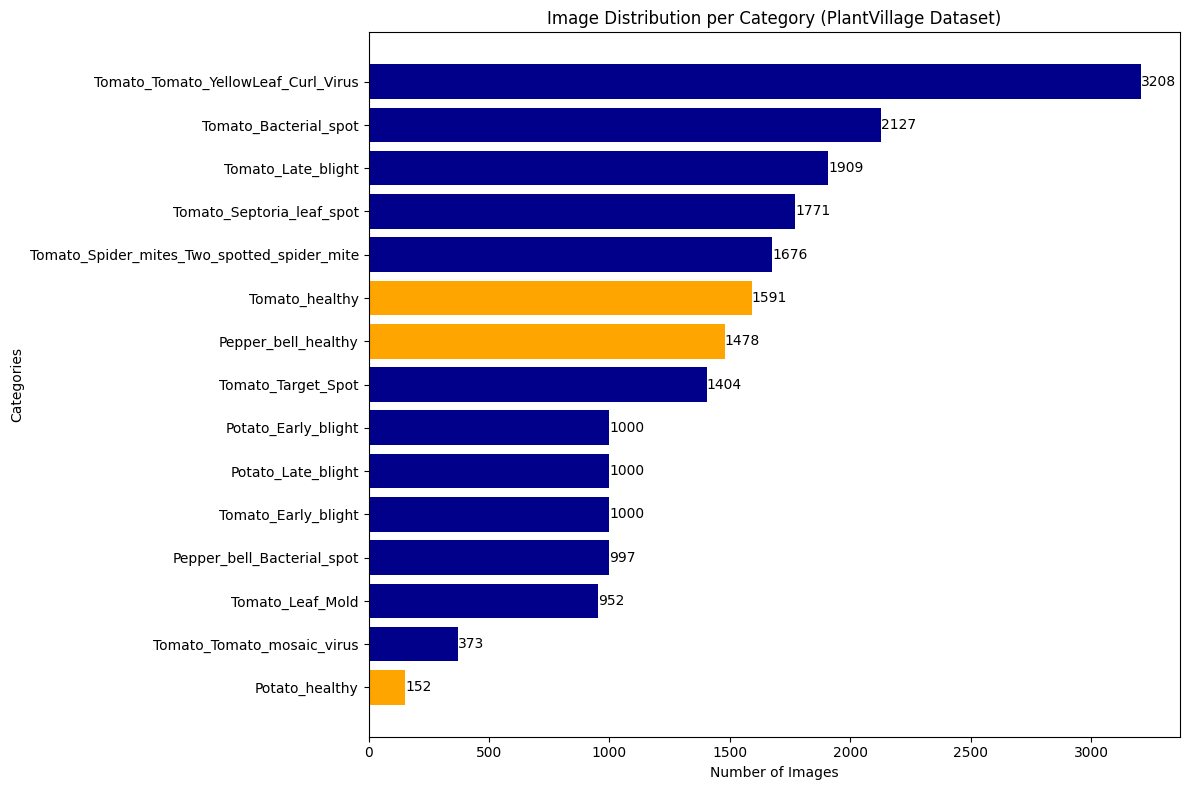

In [ ]:
# -----------------------------------------------------
# 2. Visualize the Number of Images Per Category in PlantVillage
# -----------------------------------------------------

category_counts = visualize_category_distribution(categories, original_data)

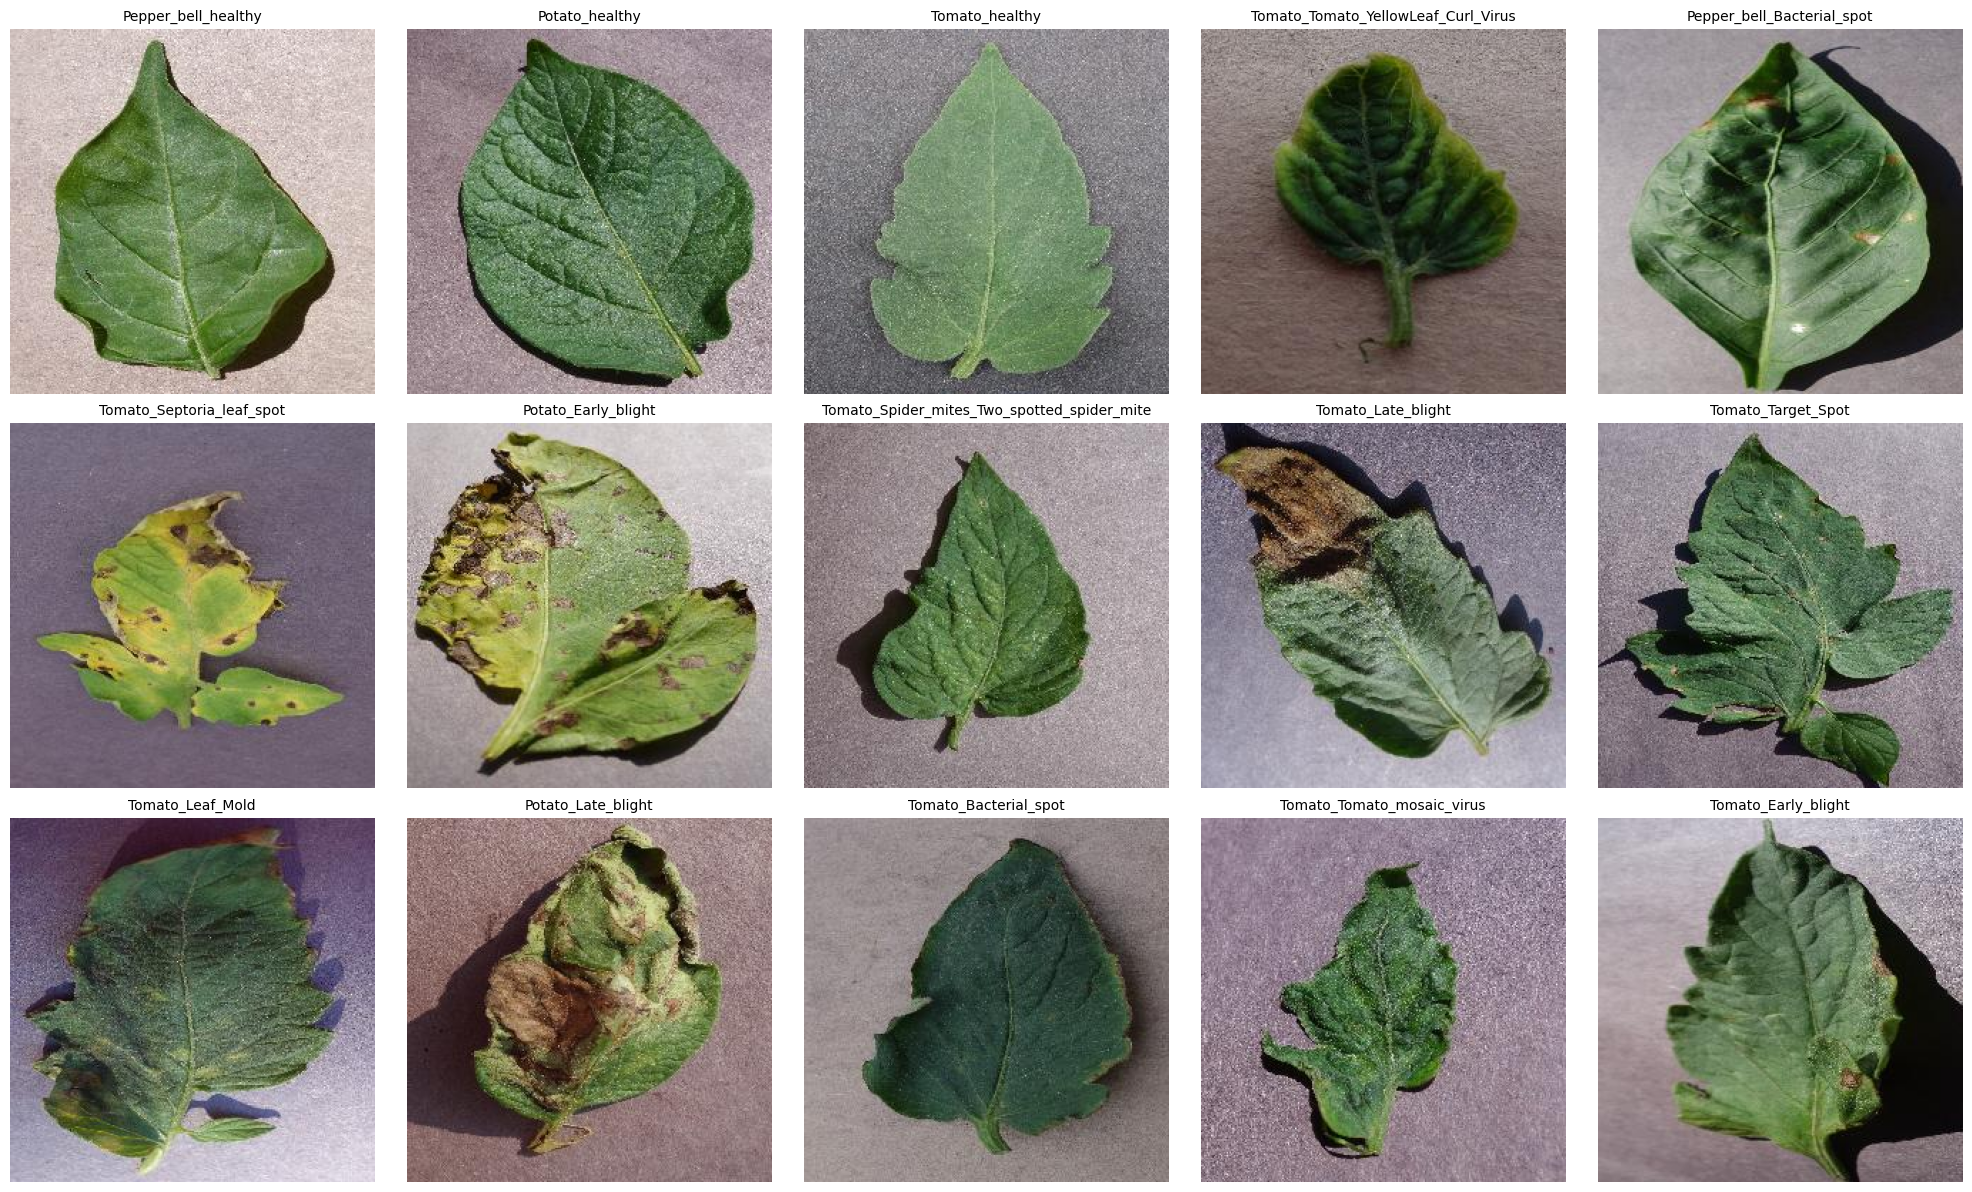

In [ ]:
# -----------------------------------------------------
# 3. Display a Random Image from Each Category
# -----------------------------------------------------

display_random_images(categories, original_data)

In [ ]:
# -----------------------------------------------------
# 4. Copy & Verify Images
# -----------------------------------------------------

transferred_images = copy_and_verify_images(categories, original_data, new_data)

Transferred 3221 healthy images.
Transferred 17417 unhealthy images.
Verification: 3221 healthy, 17417 unhealthy in new_data.


In [ ]:
# -----------------------------------------------------
# 5. Generate Summary Statistics
# -----------------------------------------------------

healthy_count, unhealthy_count, summary_df = generate_summary_statistics(new_data)


Summary Statistics for new_data:
    Category  Count Percentage
0    Healthy   3221     15.61%
1  Unhealthy  17417     84.39%
2      Total  20638    100.00%


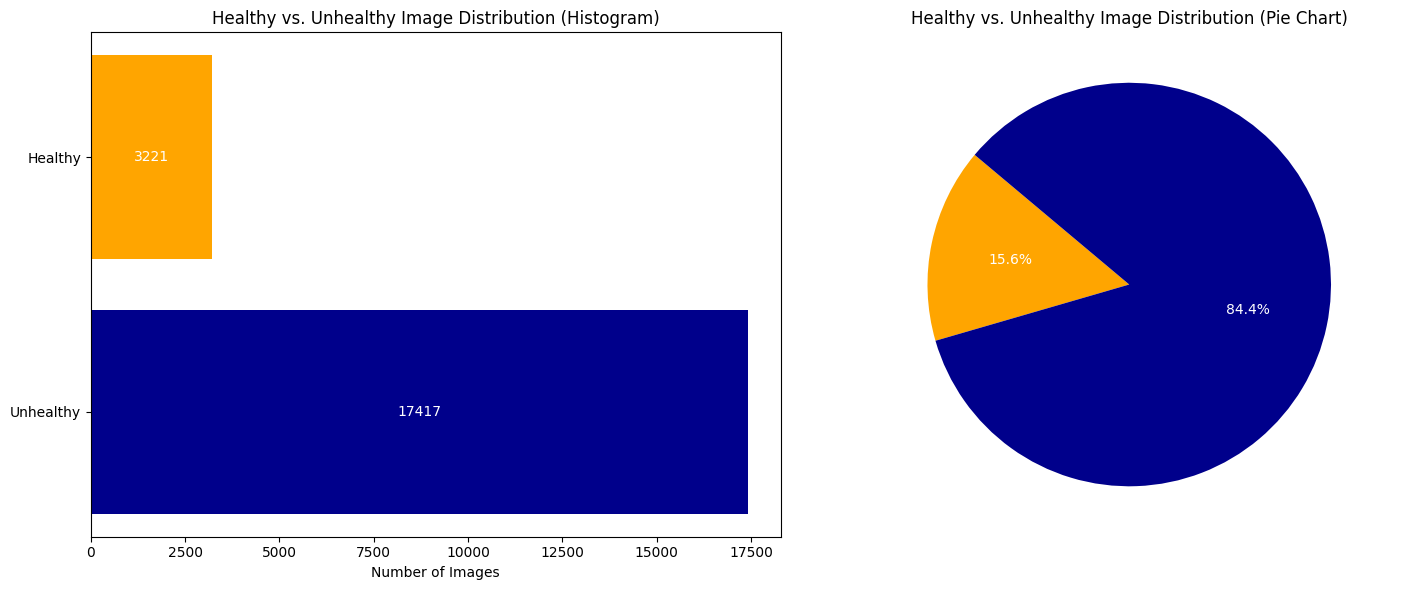

In [ ]:
# -----------------------------------------------------
# 6. Visualize the Distribution
# -----------------------------------------------------

visualize_new_data_distribution(new_data, summary_df)

## **Re-Distribution of Data**
---
---

In this phase, the dataset is split into train, validation, and test sets for both Stage 1 and Stage 2 while ensuring:

* Stratified sampling to preserve class distributions.
* Randomized selection to ensure better representation of the PlantVillage dataset.
* The splits are approximately in the ratio of 7:2:1.



In [ ]:
# =====================================================
# SECTION 7: New Splitting Functionality
# =====================================================

def split_dataset(source_dir, dest_root, seed=42):

    splits = ["train_1", "train_2", "valid_1", "valid_2", "test_1", "test_2"]
    classes = ["healthy", "unhealthy"]

    # Create directory structure for splits
    for split in splits:

        for cl in classes:
            os.makedirs(os.path.join(dest_root, split, cl), exist_ok=True)

    for cl in classes:
        files = [f for f in os.listdir(source_dir) if f.startswith(cl + "_")]
        total = len(files)

        random.seed(seed)
        random.shuffle(files)

        count_train1 = int(total * 0.35)
        count_train2 = int(total * 0.35)

        count_valid1 = int(total * 0.10)
        count_valid2 = int(total * 0.10)

        count_test1  = int(total * 0.05)

        count_assigned = count_train1 + count_train2 + count_valid1 + count_valid2 + count_test1
        count_test2  = total - count_assigned

        print(f"{cl} total: {total}, train_1: {count_train1}, train_2: {count_train2}, "
              f"valid_1: {count_valid1}, valid_2: {count_valid2}, test_1: {count_test1}, test_2: {count_test2}")

        idx = 0
        splits_files = {}
        splits_files["train_1"] = files[idx: idx+count_train1]
        idx += count_train1
        splits_files["train_2"] = files[idx: idx+count_train2]
        idx += count_train2
        splits_files["valid_1"] = files[idx: idx+count_valid1]
        idx += count_valid1
        splits_files["valid_2"] = files[idx: idx+count_valid2]
        idx += count_valid2
        splits_files["test_1"] = files[idx: idx+count_test1]
        idx += count_test1
        splits_files["test_2"] = files[idx: idx+count_test2]

        for split in splits:
            dest_dir = os.path.join(dest_root, split, cl)

            for filename in splits_files[split]:

                src_file = os.path.join(source_dir, filename)
                dst_file = os.path.join(dest_dir, filename)

                try:
                    shutil.copy2(src_file, dst_file)

                except Exception as e:
                    print(f"Error copying {src_file} to {dst_file}: {e}")

In [ ]:
# =====================================================
# SECTION 8: Check for Uniqueness Across All 6 Newly Created Datasets
# =====================================================

def check_uniqueness(dest_root):

    splits = ["train_1", "train_2", "valid_1", "valid_2", "test_1", "test_2"]
    classes = ["healthy", "unhealthy"]

    seen_files = {}  # Will map filename -> (split, class)
    duplicates = []

    for split in splits:

        for cl in classes:
            folder = os.path.join(dest_root, split, cl)

            for filename in os.listdir(folder):

                # If the file already exists in seen_files, it's a duplicate
                if filename in seen_files:
                    duplicates.append((filename, seen_files[filename], (split, cl)))

                else:
                    seen_files[filename] = (split, cl)

    if duplicates:
        print("Found duplicates:")

        for dup in duplicates:
            fname, location1, location2 = dup
            print(f"File {fname} is in both {location1} and {location2}")

    else:
        print("No duplicates found. All datasets are unique.")

    return duplicates

In [ ]:
# =====================================================
# SECTION 9: Generating the Splitting Summary
# =====================================================

def generate_split_summary(dest_root):

    splits = ["train_1", "train_2", "valid_1", "valid_2", "test_1", "test_2"]
    classes = ["healthy", "unhealthy"]

    summary = {}

    for split in splits:
        total = 0
        class_counts = {}

        for cl in classes:
            folder = os.path.join(dest_root, split, cl)
            cnt = len(os.listdir(folder))
            class_counts[cl] = cnt
            total += cnt

        summary[split] = {"healthy": class_counts["healthy"],
                          "unhealthy": class_counts["unhealthy"],
                          "total": total}

    return summary

In [ ]:
# =====================================================
# SECTION 10: Visualizing the Distribution of Data
# =====================================================

def plot_grouped_split_distribution(summary):

    # Define splits for Stage 1 and Stage 2
    stage1 = ['train_1', 'valid_1', 'test_1']
    stage2 = ['train_2', 'valid_2', 'test_2']

    # Extract healthy and unhealthy counts per split
    healthy_stage1 = [summary[s]['healthy'] for s in stage1]
    unhealthy_stage1 = [summary[s]['unhealthy'] for s in stage1]

    healthy_stage2 = [summary[s]['healthy'] for s in stage2]
    unhealthy_stage2 = [summary[s]['unhealthy'] for s in stage2]

    # Define x positions for the groups
    x_stage1 = np.array([0, 1, 2])
    x_stage2 = np.array([4, 5, 6])  # Gap between stage1 and stage2

    width = 0.35  # Width of each bar

    plt.figure(figsize=(12,6))

    # Plot bars for Stage 1
    bars1_healthy = plt.bar(x_stage1 - width/2, healthy_stage1, width, color='orange', label='Healthy (Stage 1)')
    bars1_unhealthy = plt.bar(x_stage1 + width/2, unhealthy_stage1, width, color='olive', label='Unhealthy (Stage 1)')

    # Plot bars for Stage 2
    bars2_healthy = plt.bar(x_stage2 - width/2, healthy_stage2, width, color='indigo', label='Healthy (Stage 2)')
    bars2_unhealthy = plt.bar(x_stage2 + width/2, unhealthy_stage2, width, color='purple', label='Unhealthy (Stage 2)')

    # Set x-axis ticks and labels
    all_x = np.concatenate([x_stage1, x_stage2])
    all_labels = stage1 + stage2
    plt.xticks(all_x, all_labels)

    plt.xlabel("Dataset Splits")
    plt.ylabel("Number of Images")

    plt.title("Distribution of Images by Split and Class")

    # Annotate each bar with the count above the bar
    def annotate_bars(bars):

        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
                     ha='center', va='bottom', fontsize=10)

    annotate_bars(bars1_healthy)
    annotate_bars(bars1_unhealthy)
    annotate_bars(bars2_healthy)
    annotate_bars(bars2_unhealthy)

    plt.legend(loc='upper right')
    plt.tight_layout()

    plt.show()

### Execution

In [ ]:
# -----------------------------------------------------
# 7. Creating the New Distribution of Data
# -----------------------------------------------------

split_dataset(new_data, split_root, seed=42)

healthy total: 3221, train_1: 1127, train_2: 1127, valid_1: 322, valid_2: 322, test_1: 161, test_2: 162
unhealthy total: 17417, train_1: 6095, train_2: 6095, valid_1: 1741, valid_2: 1741, test_1: 870, test_2: 875


In [ ]:
# -----------------------------------------------------
# 8. Checking for Uniqueness After Splitting the Dataset
# -----------------------------------------------------

duplicates = check_uniqueness(split_root)

No duplicates found. All datasets are unique.


In [ ]:
# -----------------------------------------------------
# 9. Summary Statistics of the New Datasets
# -----------------------------------------------------

split_summary = generate_split_summary(split_root)

print("Split Summary Statistics:")
print(pd.DataFrame(split_summary).T)

Split Summary Statistics:
         healthy  unhealthy  total
train_1     1127       6095   7222
train_2     1127       6095   7222
valid_1      322       1741   2063
valid_2      322       1741   2063
test_1       161        870   1031
test_2       162        875   1037


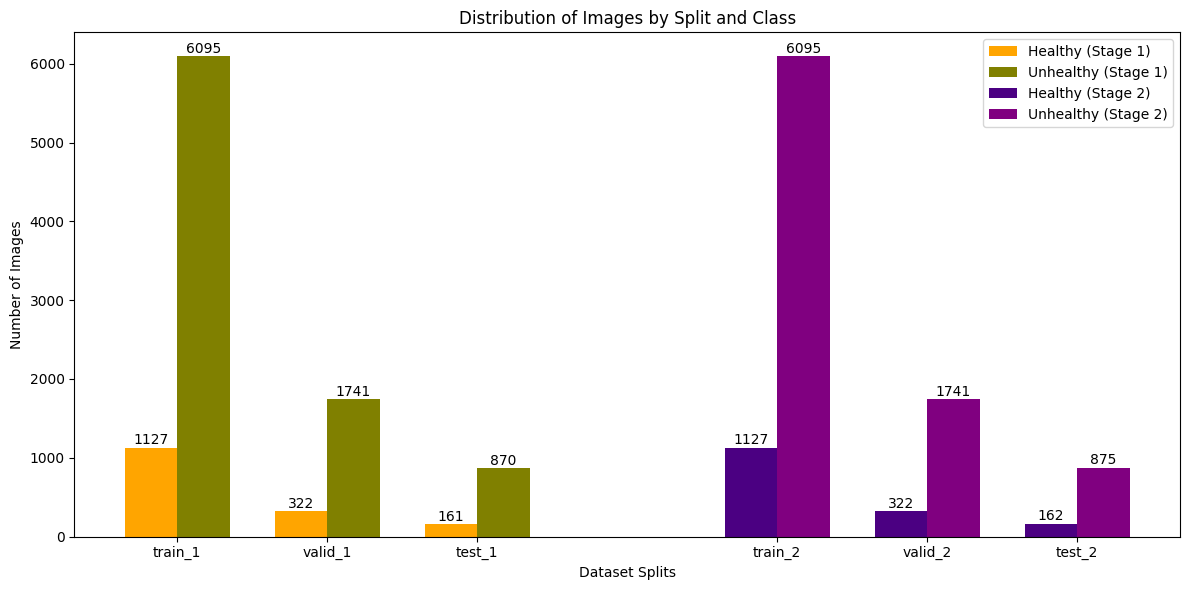

In [ ]:
# -----------------------------------------------------
# 10. Histogram of the New Datasets Per Stage
# -----------------------------------------------------

plot_grouped_split_distribution(split_summary)

## **Developing the BLM**

---
---

The following is the description of the BLM implementation of the transfer learning pipeline using MobileNetV2. An overview of the code is listed:

1. Transfer Learning:
    
    The architecture of MobileNetV2 is considered to be lightweight and efficient making it an ideal choice to operate on platforms with low computational resources.

2. Data Preparation:

    * ImageDataGenerator:
        
        From the Keras library, this class is applied to facilitate data augmentation during the training process only. The image transformations are rotation, shifting, zooming and horizontal flipping and are designed to improve generalization as well as reducing overfitting.

        Furthermore, with regards to the validation and test sets, no image transformations occur. Only rescaling is initiated, thus leading to an unbiased evaluation.
    
    * Directory Structure:

        Each folder: `train_1`, `valid_1`, `test_1` possess two further binary class subfolders. The images for each class are contained in each subfolder which is a requirement from the generators, thus enabling Keras to map them to their respective binary labels; {0, 1}.
3. Callbacks:

    * Global Validation Metrics:

        The metrics are not calculated per batch. Instead, the aggregated predictions are taken over the whole validation set (in other words, at the end of every epoch) and computed. This is expressed in a confusion matrix and is accompanied by the Accuracy, Precision, Recall, F1-Score and MCC metrics.

        The results are indicative of a lower threshold (0.3) for classification, which is an attempt to improve the Recall metric.
    
    * Test Loss:

        A test loss is recorded at the end of every epoch, thus enabling a direct comparison to be made with the training, validation and test loss curves.

4. Hyperparameter Random Search:

    * Scikit-Learn's 'RandomSearchCV' was deemed to be too inflexible. Therefore, the alternative approach was to custom code a function through a loop process. The hyperparameters that are being investigated are:
    
        * Width multiplier: $\alpha$

        * Learning rate: $\eta$

        * Dropout rate: $\mathbb{P} $

    * For each trial, the best global validation MCC is recorded. From the 10 trials, the one with the highest performance - measured by the MCC metric - is classified as being the '*best model* '.

5. Improving Generalization:

  * The $L_2$ regularizer is encoded in the final dense layer. Its primary objective is to penalize large weights which in essence can reduce overfitting from over zealous features.
  
  * As previously mentioned, the classification threshold has been lowered from the default value of 0.5 to 0.3. It is purely an attempt to improve the Recall metric on the majority class - unhealthy.
    
    Remark: In disease detection environments, Recall is the prominent metric that needs to be monitored and that the minority class tends to be unhealthy which is not the case in this classification problem.

6. Visualization:

    The loss curves from the training, validation and test results will give some indication of the convergence and overfitting. This aids in our overall accuracy as well as a more granular understanding of class-specific performance, a vital element in assessing binary classification with imbalanced data.

7. Evaluation:

    * Global Metrics Comparison:

    A helper function has been defined to calculate the global metrics on the three datasets and then tabulated together with their associated confusion matrices.

    * Final Test Evaluation:
    The '*best model* ' is subsequently computed on the test set, thereby ensuring an unbiased evaluation.

In [ ]:
# -----------------------------------------------------
# Importing Libraries
# -----------------------------------------------------

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2  # For L2 regularization

from sklearn.metrics import confusion_matrix, matthews_corrcoef, precision_score, recall_score, f1_score

In [ ]:
# -----------------------------------------------------
# Directories & Parameters
# -----------------------------------------------------

train_dir = '/content/drive/My Drive/split_dataset/train_1'
val_dir   = '/content/drive/My Drive/split_dataset/valid_1'
test_dir  = '/content/drive/My Drive/split_dataset/test_1'
model_save_path = '/content/drive/My Drive/BLM.keras' # Where the best model will be saved

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20

In [ ]:
# -----------------------------------------------------
# Custom MCC Metric -> for Model Compilation
# -----------------------------------------------------

def matthews_correlation(y_true, y_pred):

    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos
    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)
    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    numerator = (tp * tn - fp * fn)
    denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    return numerator / (denominator + K.epsilon())

In [ ]:
# -----------------------------------------------------
# Global Validation Metrics Callback
# -----------------------------------------------------

class GlobalValidationMetricsCallback(Callback):

    def __init__(self, validation_data):

        super(GlobalValidationMetricsCallback, self).__init__()
        self.validation_data = validation_data
        self.global_metrics = []  # Stores metrics for each epoch

    def on_epoch_end(self, epoch, logs=None):

        self.validation_data.reset()
        y_pred = self.model.predict(self.validation_data, verbose=0)

        # Lower threshold to 0.3 instead of 0.5 for binary classification
        y_pred_bin = (y_pred > 0.3).astype(int).flatten()
        y_true = self.validation_data.classes

        cm = confusion_matrix(y_true, y_pred_bin)
        accuracy = np.mean(y_true == y_pred_bin)
        precision = precision_score(y_true, y_pred_bin, zero_division=0)
        recall = recall_score(y_true, y_pred_bin, zero_division=0)
        f1 = f1_score(y_true, y_pred_bin, zero_division=0)
        mcc = matthews_corrcoef(y_true, y_pred_bin)

        print(f"\nEpoch {epoch+1} Global Validation Metrics:")
        print("Confusion Matrix:")
        print(cm)
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
              f"Recall: {recall:.4f}, F1: {f1:.4f}, MCC: {mcc:.4f}\n")

        self.global_metrics.append({
            "epoch": epoch+1,
            "cm": cm,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "mcc": mcc
        })

In [ ]:
# -----------------------------------------------------
# Test Loss Callback -> Records Test Loss Per Epoch
# -----------------------------------------------------

class TestLossCallback(Callback):

    def __init__(self, test_data):

        super(TestLossCallback, self).__init__()
        self.test_data = test_data
        self.test_losses = []  # To store test loss for each epoch

    def on_epoch_end(self, epoch, logs=None):

        self.test_data.reset()
        result = self.model.evaluate(self.test_data, verbose=0)
        test_loss = result[0]  # Assuming loss is the first output
        self.test_losses.append(test_loss)

        print(f"Epoch {epoch+1} Test Loss: {test_loss:.4f}")

In [ ]:
# -----------------------------------------------------
# Model Builder Function
# -----------------------------------------------------

def build_model(alpha, dropout_rate, lr):

    base_model = MobileNetV2(weights='imagenet', include_top=False,
                             input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
                             alpha=alpha)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)

    # L2 regularizer with lambda=1.0 -> the final Dense layer
    output = Dense(1, activation='sigmoid', kernel_regularizer=l2(1.0))(x)
    model = Model(inputs=base_model.input, outputs=output)
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=[matthews_correlation])

    return model

In [ ]:
# -----------------------------------------------------
# Data Generators
# -----------------------------------------------------

# For training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and test (only rescaling)
test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Create an evaluation generator for training (without augmentation) for metric comparison
train_eval_generator = test_val_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 7222 images belonging to 2 classes.
Found 2063 images belonging to 2 classes.
Found 1031 images belonging to 2 classes.
Found 7222 images belonging to 2 classes.


### Execution

In [ ]:
# =====================================================
# Hyperparameter Random Search
# =====================================================

alphas = [0.35, 0.5, 0.75, 1.0]
learning_rates = [1e-4, 1e-5, 1e-6]
dropouts = [0.1, 0.3, 0.5]

num_trials = 10  # Number of random combinations to try
search_results = []  # To store hyperparameters and performance

for i in range(num_trials):
    alpha = random.choice(alphas)
    lr = random.choice(learning_rates)
    dropout_rate = random.choice(dropouts)

    print(f"\nTrial {i+1}: alpha={alpha}, lr={lr}, dropout={dropout_rate}")

    model = build_model(alpha, dropout_rate, lr)

    # Instantiate callbacks for global validation metrics and test loss recording
    global_val_metrics_cb = GlobalValidationMetricsCallback(validation_generator)
    test_loss_cb = TestLossCallback(test_generator)

    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=validation_generator,
        callbacks=[global_val_metrics_cb, test_loss_cb],
        verbose=2
    )

    # Use the best epoch (based on global MCC) as trial performance
    best_epoch_metrics = max(global_val_metrics_cb.global_metrics, key=lambda x: x["mcc"])
    best_val_mcc = best_epoch_metrics["mcc"]

    search_results.append({
        'alpha': alpha,
        'lr': lr,
        'dropout': dropout_rate,
        'best_val_mcc': best_val_mcc,
        'history': history,
        'global_metrics': global_val_metrics_cb.global_metrics,
        'test_losses': test_loss_cb.test_losses,
        'model': model
    })

results_df = pd.DataFrame([
    {'Trial': i+1,
     'alpha': res['alpha'],
     'lr': res['lr'],
     'dropout': res['dropout'],
     'best_val_mcc': res['best_val_mcc']}
    for i, res in enumerate(search_results)
])

print("\nHyperparameter Search Results:")
print(results_df.sort_values(by='best_val_mcc', ascending=False))


Trial 1: alpha=0.75, lr=1e-06, dropout=0.1


<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


5903360/5903360 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[ 232   90]
 [1533  208]]
Accuracy: 0.2133, Precision: 0.6980, Recall: 0.1195, F1: 0.2040, MCC: -0.1652



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1 Test Loss: 3.5662
226/226 - 4375s - 19s/step - loss: 2.8438 - matthews_correlation: 0.0000e+00 - val_loss: 3.5645 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[ 265   57]
 [1431  310]]
Accuracy: 0.2787, Precision: 0.8447, Recall: 0.1781, F1: 0.2941, MCC: 0.0010

Epoch 2 Test Loss: 3.4383
226/226 - 106s - 469ms/step - loss: 2.6970 - matthews_correlation: 0.0000e+00 - val_loss: 3.4347 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[ 287   35]
 [1279  462]]
Accuracy: 0.3631, Precision: 0.9296, Recall: 0.2654, F1: 0.4129, MCC: 0.1330

Epoch 3 Test Loss: 3.3154
226/226 - 106s - 468ms/step - loss: 2.5719 - matthews_correlation: 0.0000e+00 - val_loss: 3.3100 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Epoch 4 Global Validation Metrics:
Confusion Matrix:
[[ 303   19]
 [1110  631]]
Accuracy: 0.4527, Precision: 0.9708, Recall: 0.3624, F1: 0.5278, MCC: 0.2371

Epoch

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


3201480/3201480 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_157']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_157']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1726   15]]
Accuracy: 0.1634, Precision: 1.0000, Recall: 0.0086, F1: 0.0171, MCC: 0.0368

Epoch 1 Test Loss: 7.5711
226/226 - 192s - 849ms/step - loss: 1.5909 - matthews_correlation: 0.0000e+00 - val_loss: 7.5298 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1593  148]]
Accuracy: 0.2278, Precision: 1.0000, Recall: 0.0850, F1: 0.1567, MCC: 0.1196

Epoch 2 Test Loss: 5.5080
226/226 - 105s - 466ms/step - loss: 0.6014 - matthews_correlation: 0.0000e+00 - val_loss: 5.3645 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1073  668]]
Accuracy: 0.4799, Precision: 1.0000, Recall: 0.3837, F1: 0.5546, MCC: 0.2976

Epoch 3 Test Loss: 2.6540
226/226 - 105s - 466ms/step - loss: 0.2506 - matthews_correlation: 0.0000e+00 - val_loss: 2.5020 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Epo

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_314']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_314']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[ 280   42]
 [ 582 1159]]
Accuracy: 0.6975, Precision: 0.9650, Recall: 0.6657, F1: 0.7879, MCC: 0.3939

Epoch 1 Test Loss: 2.8382
226/226 - 184s - 813ms/step - loss: 2.6316 - matthews_correlation: 0.0000e+00 - val_loss: 2.8450 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[ 317    5]
 [ 587 1154]]
Accuracy: 0.7130, Precision: 0.9957, Recall: 0.6628, F1: 0.7959, MCC: 0.4735

Epoch 2 Test Loss: 2.7468
226/226 - 105s - 464ms/step - loss: 2.1754 - matthews_correlation: 0.0000e+00 - val_loss: 2.7305 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[ 318    4]
 [ 609 1132]]
Accuracy: 0.7029, Precision: 0.9965, Recall: 0.6502, F1: 0.7869, MCC: 0.4653

Epoch 3 Test Loss: 2.6788
226/226 - 105s - 466ms/step - loss: 1.9318 - matthews_correlation: 0.0000e+00 - val_loss: 2.6471 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Epo

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_471']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_471']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[  79  243]
 [ 318 1423]]
Accuracy: 0.7281, Precision: 0.8541, Recall: 0.8173, F1: 0.8353, MCC: 0.0577

Epoch 1 Test Loss: 2.8620
226/226 - 175s - 776ms/step - loss: 2.7818 - matthews_correlation: 0.0000e+00 - val_loss: 2.8625 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[  69  253]
 [ 179 1562]]
Accuracy: 0.7906, Precision: 0.8606, Recall: 0.8972, F1: 0.8785, MCC: 0.1244

Epoch 2 Test Loss: 2.7464
226/226 - 106s - 468ms/step - loss: 2.7154 - matthews_correlation: 0.0000e+00 - val_loss: 2.7528 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[  59  263]
 [  85 1656]]
Accuracy: 0.8313, Precision: 0.8629, Recall: 0.9512, F1: 0.9049, MCC: 0.1914

Epoch 3 Test Loss: 2.6449
226/226 - 106s - 470ms/step - loss: 2.6606 - matthews_correlation: 0.0000e+00 - val_loss: 2.6547 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Epo

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_628']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_628']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1485  256]]
Accuracy: 0.2802, Precision: 1.0000, Recall: 0.1470, F1: 0.2564, MCC: 0.1619

Epoch 1 Test Loss: 4.0596
226/226 - 202s - 892ms/step - loss: 2.4546 - matthews_correlation: 0.0000e+00 - val_loss: 4.0351 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1466  275]]
Accuracy: 0.2894, Precision: 1.0000, Recall: 0.1580, F1: 0.2728, MCC: 0.1687

Epoch 2 Test Loss: 4.3660
226/226 - 105s - 465ms/step - loss: 2.0205 - matthews_correlation: 0.0000e+00 - val_loss: 4.3329 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1446  295]]
Accuracy: 0.2991, Precision: 1.0000, Recall: 0.1694, F1: 0.2898, MCC: 0.1757

Epoch 3 Test Loss: 4.4311
226/226 - 106s - 468ms/step - loss: 1.8163 - matthews_correlation: 0.0000e+00 - val_loss: 4.3926 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Epo

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_785']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_785']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1626  115]]
Accuracy: 0.2118, Precision: 1.0000, Recall: 0.0661, F1: 0.1239, MCC: 0.1045

Epoch 1 Test Loss: 7.4926
226/226 - 175s - 772ms/step - loss: 1.4153 - matthews_correlation: 0.0000e+00 - val_loss: 7.4276 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1683   58]]
Accuracy: 0.1842, Precision: 1.0000, Recall: 0.0333, F1: 0.0645, MCC: 0.0731

Epoch 2 Test Loss: 9.0237
226/226 - 106s - 470ms/step - loss: 0.5080 - matthews_correlation: 0.0000e+00 - val_loss: 8.9758 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[ 322    0]
 [1493  248]]
Accuracy: 0.2763, Precision: 1.0000, Recall: 0.1424, F1: 0.2494, MCC: 0.1590

Epoch 3 Test Loss: 5.7013
226/226 - 105s - 464ms/step - loss: 0.2044 - matthews_correlation: 0.0000e+00 - val_loss: 5.5823 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Epo

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_942']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_942']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[   4  318]
 [  23 1718]]
Accuracy: 0.8347, Precision: 0.8438, Recall: 0.9868, F1: 0.9097, MCC: -0.0025

Epoch 1 Test Loss: 2.5626
226/226 - 183s - 810ms/step - loss: 2.6464 - matthews_correlation: 0.0000e+00 - val_loss: 2.5497 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[   5  317]
 [  21 1720]]
Accuracy: 0.8362, Precision: 0.8444, Recall: 0.9879, F1: 0.9105, MCC: 0.0113

Epoch 2 Test Loss: 2.5347
226/226 - 110s - 485ms/step - loss: 2.5754 - matthews_correlation: 0.0000e+00 - val_loss: 2.5207 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[  12  310]
 [  20 1721]]
Accuracy: 0.8400, Precision: 0.8474, Recall: 0.9885, F1: 0.9125, MCC: 0.0757

Epoch 3 Test Loss: 2.5115
226/226 - 112s - 496ms/step - loss: 2.5156 - matthews_correlation: 0.0000e+00 - val_loss: 2.4953 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Ep

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1099']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1099']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[   4  318]
 [   6 1735]]
Accuracy: 0.8429, Precision: 0.8451, Recall: 0.9966, F1: 0.9146, MCC: 0.0469

Epoch 1 Test Loss: 2.4426
226/226 - 187s - 826ms/step - loss: 2.4089 - matthews_correlation: 0.0000e+00 - val_loss: 2.4489 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[  40  282]
 [  20 1721]]
Accuracy: 0.8536, Precision: 0.8592, Recall: 0.9885, F1: 0.9193, MCC: 0.2435

Epoch 2 Test Loss: 2.4275
226/226 - 110s - 488ms/step - loss: 2.3345 - matthews_correlation: 0.0000e+00 - val_loss: 2.4361 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[ 107  215]
 [  41 1700]]
Accuracy: 0.8759, Precision: 0.8877, Recall: 0.9765, F1: 0.9300, MCC: 0.4342

Epoch 3 Test Loss: 2.4179
226/226 - 106s - 469ms/step - loss: 2.2753 - matthews_correlation: 0.0000e+00 - val_loss: 2.4280 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Epo

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1256']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1256']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[   4  318]
 [  45 1696]]
Accuracy: 0.8240, Precision: 0.8421, Recall: 0.9742, F1: 0.9033, MCC: -0.0320

Epoch 1 Test Loss: 2.6963
226/226 - 183s - 809ms/step - loss: 2.6455 - matthews_correlation: 0.0000e+00 - val_loss: 2.7011 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[   6  316]
 [  42 1699]]
Accuracy: 0.8265, Precision: 0.8432, Recall: 0.9759, F1: 0.9047, MCC: -0.0132

Epoch 2 Test Loss: 2.6437
226/226 - 110s - 487ms/step - loss: 2.5663 - matthews_correlation: 0.0000e+00 - val_loss: 2.6470 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[  14  308]
 [  52 1689]]
Accuracy: 0.8255, Precision: 0.8458, Recall: 0.9701, F1: 0.9037, MCC: 0.0281

Epoch 3 Test Loss: 2.6055
226/226 - 111s - 489ms/step - loss: 2.4954 - matthews_correlation: 0.0000e+00 - val_loss: 2.6070 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

E

<ipython-input-26-c05881ca9a22>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1413']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1413']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



Epoch 1 Global Validation Metrics:
Confusion Matrix:
[[ 108  214]
 [ 692 1049]]
Accuracy: 0.5608, Precision: 0.8306, Recall: 0.6025, F1: 0.6984, MCC: -0.0462

Epoch 1 Test Loss: 3.0431
226/226 - 182s - 806ms/step - loss: 2.7704 - matthews_correlation: 0.0000e+00 - val_loss: 3.0301 - val_matthews_correlation: 0.0000e+00
Epoch 2/20

Epoch 2 Global Validation Metrics:
Confusion Matrix:
[[ 116  206]
 [ 590 1151]]
Accuracy: 0.6142, Precision: 0.8482, Recall: 0.6611, F1: 0.7431, MCC: 0.0163

Epoch 2 Test Loss: 2.9749
226/226 - 109s - 483ms/step - loss: 2.6979 - matthews_correlation: 0.0000e+00 - val_loss: 2.9647 - val_matthews_correlation: 0.0000e+00
Epoch 3/20

Epoch 3 Global Validation Metrics:
Confusion Matrix:
[[ 121  201]
 [ 464 1277]]
Accuracy: 0.6777, Precision: 0.8640, Recall: 0.7335, F1: 0.7934, MCC: 0.0880

Epoch 3 Test Loss: 2.9013
226/226 - 110s - 486ms/step - loss: 2.6258 - matthews_correlation: 0.0000e+00 - val_loss: 2.8927 - val_matthews_correlation: 0.0000e+00
Epoch 4/20

Ep


Best Hyperparameters:
alpha: 0.5, lr: 0.0001, dropout: 0.3


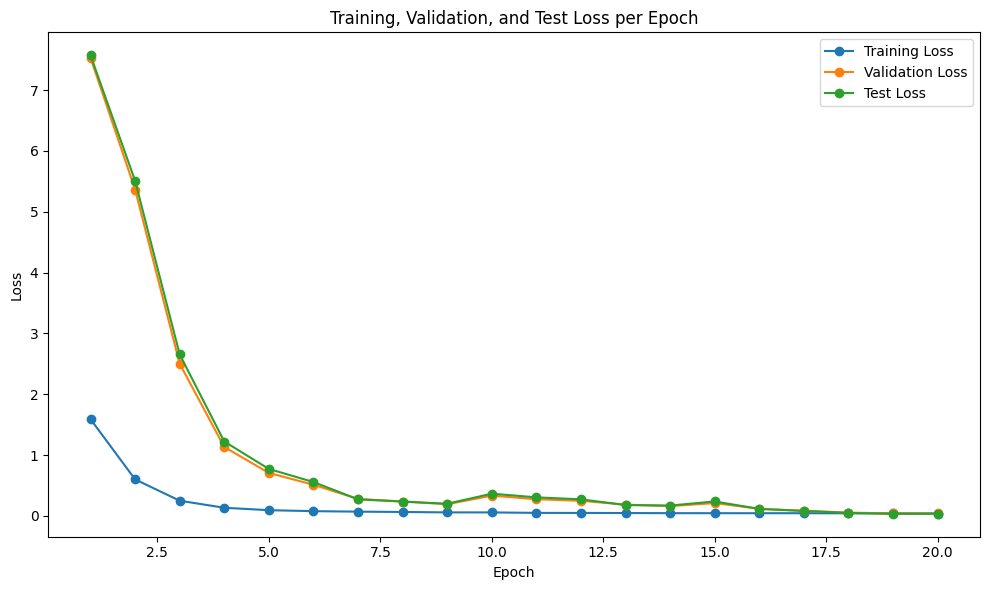

In [ ]:
# =====================================================
# Select the Best Model & Plot Loss Curves
# =====================================================

best_trial = max(search_results, key=lambda x: x['best_val_mcc'])

print("\nBest Hyperparameters:")
print(f"alpha: {best_trial['alpha']}, lr: {best_trial['lr']}, dropout: {best_trial['dropout']}")

# Plot loss curves for the best trial
history = best_trial['history']

train_loss = history.history['loss']
val_loss = history.history['val_loss']
test_loss = best_trial['test_losses']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(10,6))

plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.title('Training, Validation, and Test Loss per Epoch')
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# -----------------------------------------------------
# Helper Function to Compute Global Metrics
# -----------------------------------------------------

def compute_global_metrics(model, data_generator, threshold=0.3):

    data_generator.reset()
    preds = model.predict(data_generator, verbose=0)

    # Lower threshold to 0.3
    preds_bin = (preds > threshold).astype(int).flatten()
    true_labels = data_generator.classes

    cm = confusion_matrix(true_labels, preds_bin)
    accuracy = np.mean(true_labels == preds_bin)
    precision = precision_score(true_labels, preds_bin, zero_division=0)
    recall = recall_score(true_labels, preds_bin, zero_division=0)
    f1 = f1_score(true_labels, preds_bin, zero_division=0)
    mcc = matthews_corrcoef(true_labels, preds_bin)

    return {'cm': cm, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'mcc': mcc}

In [ ]:
# =====================================================
# Compute Metrics on Training, Validation, & Test Sets
# =====================================================

train_metrics = compute_global_metrics(best_trial['model'], train_eval_generator, threshold=0.3)
val_metrics = compute_global_metrics(best_trial['model'], validation_generator, threshold=0.3)
test_metrics = compute_global_metrics(best_trial['model'], test_generator, threshold=0.3)

# Create a summary table
metrics_summary = pd.DataFrame({
    'Dataset': ['Training', 'Validation', 'Test'],
    'Accuracy': [train_metrics['accuracy'], val_metrics['accuracy'], test_metrics['accuracy']],
    'Precision': [train_metrics['precision'], val_metrics['precision'], test_metrics['precision']],
    'Recall': [train_metrics['recall'], val_metrics['recall'], test_metrics['recall']],
    'F1-Score': [train_metrics['f1'], val_metrics['f1'], test_metrics['f1']],
    'MCC': [train_metrics['mcc'], val_metrics['mcc'], test_metrics['mcc']]
})

print("\nGlobal Metrics Summary:")
print(metrics_summary)

# Print confusion matrices for each dataset
print("\nTraining Set Confusion Matrix:")
print(train_metrics['cm'])

print("\nValidation Set Confusion Matrix:")
print(val_metrics['cm'])

print("\nTest Set Confusion Matrix:")
print(test_metrics['cm'])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Global Metrics Summary:
      Dataset  Accuracy  Precision    Recall  F1-Score       MCC
0    Training  0.999862   1.000000  0.999836  0.999918  0.999475
1  Validation  0.998546   0.998852  0.999426  0.999139  0.994475
2        Test  1.000000   1.000000  1.000000  1.000000  1.000000

Training Set Confusion Matrix:
[[1127    0]
 [   1 6094]]

Validation Set Confusion Matrix:
[[ 320    2]
 [   1 1740]]

Test Set Confusion Matrix:
[[161   0]
 [  0 870]]


In [ ]:
# =====================================================
# Final Evaluation on Test Set & Save the Best Model
# =====================================================

test_generator.reset()
preds = best_trial['model'].predict(test_generator, verbose=1)

# Lower threshold to 0.3 for final evaluation
pred_labels = (preds > 0.3).astype(int).flatten()
true_labels = test_generator.classes
cm_test = confusion_matrix(true_labels, pred_labels)

print("\nFinal Test Set Confusion Matrix:")
print(cm_test)

# Save the best model
best_trial['model'].save(model_save_path)
print(f"\nBest model saved to: {model_save_path}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step

Final Test Set Confusion Matrix:
[[161   0]
 [  0 870]]

Best model saved to: /content/drive/My Drive/BLM.keras


# **Stage 2 - FSLM**
---
---

This stage is concerned with the development of the FSL paradigm with a transfer learning model - MobileNetV2. The previous stage saw three hyperparameters that were deemed as being optimal when subjected to the PlantVillage dataset during a random search within the hyperparameter-tuning process of the BLM. Thus, the following hyperparameters will be the only remnants that will be carried over from the outset and encoded within the architecture of the newly created FSLM:

* Width Multiplier: $\alpha = 0.5$

* Learning Rate: $\eta= 0.0001$

* Dropout: $\mathbb{P}=0.3$

There will be several critical processes that constitute the creation of the FSLM:

1. Training will be initiated by using a Siamese Network setup underpinned by using a triplet loss function.
2. Hyperparameter-tuning and testing will incorporate the Few-Shot Learning paradigm, utilizing the  2-way 5-shot framework.

    * The preparation of the episodic sets of the support and query sets, with the data being annotated during hyperparameter-tuning and during testing, only the support set being annotated.

    * The fundamental tuning of the model being conducted by Bayesian optimization algorithm.




## **(1) Training**
---
---


The model will be trained to learn a discriminative embedding space using a Siamese Network setup, with it's architecture having the three optimal hyperparameters that were developed by the BLM. The triplet loss function is the metric learning loss that will enforce a separation between the $d_{ap}=d^+$ and $d_{an}=d^-$ pairs. Learning the necessary patterns from the features, (i.e. minimizing the Euclidean distance between similar images, while maximizing the Euclidean distance between dissimilar pairs)  which are abstractly embedded within the data, is acquired by using backpropagation and gradient descent processes, namely, updating the structural parameters to ensure convergence of the metric learning loss. In other words, the variances of one binary class must be distinguishable from the other. The margin $α_{\text{ trip}}$ is the key component  that determines how far apart dissimilar variables must be. Once these embeddings are learnt, the model will be ready for the next process  where it will undergo hyperparameter-tuning of its hyperparameters using Bayesian optimization in an episodic setting; Few-Shot task.

The Siamese Network takes the form:

$$\begin{aligned} d^+ &= ||f_w \left( X^+\right)-f_w \left( X^a\right)||^2_2 \\ d^- &=||f_w \left( X^a\right)-f_w \left( X^-\right)||^2_2\end{aligned}$$

$$\text{Loss}\{ X^a,X^+,X^-\}=\text{max}\left( 0, d^+ + \alpha_{\text{ trip}}- d^- \right)$$

Where:
* $X^a$: Anchor
* $X^+$: Positive
* $X^-$: Negative
* $f_w \left( X^*\right)$: Convolutional neural network
* $\alpha_{\text{ trip}}$: Triplet loss separation parameter
----

The following is a brief overview of the coding implementation:

* **Parameters & Directories**

    MobileNetV2 requires the dimensional inputs of the images to be 224 x 224.

    * Image Loading & Preprocessing:

    To enforce a more stringent regime to acquire better consistent performances from deep learning models, the criteria is to diminish over dominant features that reside within the data. This is achieved by  standardizing image size and scaling pixel values. Thus potentially eradicating the inherent biases that may be introduced through variations in scale and intensity during training, resulting in better generalization.

    * Create Lists of File Paths for Each Class:
    
    These file paths will help towards random image sampling during the selection of triplets, thus giving a greater degree of control.

* **Build the Siamese Network with Triplet Loss**
    * The Base Model:
    
    The MobileNetV2 is the designated feature extractor with it’s pretrained weights from the ImageNet dataset. It has the final classification element removed, thereby allowing the previously learnt features to be used: `include_top=False`.

    The three optimal hyperparameters that were discovered during the hyperparameter-tuning using random search from the previous stage are implemented within the architecture of the model:

        * Width Multiplier: $\alpha = 0.5$

        * Learning Rate: $\eta= 0.0001$

        * Dropout: $\mathbb{P}=0.3$

    The global average pooling is used `pooling='avg'` which reduces the final convolutional features to a 1,280-dimensional vector.

        * Embedding Network:
        
        A 30% dropout rate which is a regularization technique, is introduced to decrease the likelihood of overfitting due to the small sample sizes that are used.
        
        Dedicated Dense layers are then implemented to compress the extracted features to a 128-dimensional space. These trainable dedicated Dense layers essentially learn to project the 1,280-dimensional feature vector to a 128-dimensional vector by applying a linear mapping: `activation=None`.
        
        A lambda layer is then applied: $l_2$ normalization to each of the 128-dimensional feature vectors, ensuring the embeddings lie on a unit hypersphere, allowing the Euclidean distances $\left( l_2 \right)$ to be more impactful.

        The anchor, positive and negative inputs are implemented within the embedding network which computes the embeddings. These calculations are collected to then establish the triplet loss.

        * Triplet Loss:

        The metric learning loss function is implemented to compute the triplet loss. It is engineered to ensure that the $d_{ap}$ pair is closer than the pair of $d_{an}$ by $\alpha_{\text{ trip}}$, namely: `margin=0.2`. A noteworthy remark is that the function takes the loss values from all the triplets and computes the mean, which is then taken as to be the final loss value.

* **Custom Triplet Generator**

    The generator produces batches of triplets, such that for every triplet, an image is chosen from one class (nominated as the anchor), another image is then chosen from the same class (nominated as the positive), and then the final image is chosen from the opposing class (nominated as the negative). Dummy labels subsequently are assigned to the binary classes, as the loss is calculated from the embeddings and not from the labels.
    
    The generator continuously issues batches of triplets, which eliminates the necessity to load the entire `train_2` dataset into memory. By customizing this generator, it allows more control and flexibility on how the triplets are sampled, while ‘*off-the-shelf* ’ processes could be too stringent in their approach when difficult extractions of triplets occur.

* **Wrap Generator**

    The triplet generator, as previously discussed is wrapped with `tf.data.Dataset`. This process creates a Tensorflow dataset, thereby allowing it to optimize the data pipeline. Furthermore, providing the `output_signature`, avoids any discrepancy concerning type and shape.

* **Visualizations:**
    1.	Triplet Loss Curve:
    
    The convergence during training will indicate if the model is effectively minimizing the triplet loss over all the epochs . If the network is learning (i.e. satisfying the triplet loss constraints) a  decrease in loss over time should be observed. Due to the quantitative properties of the loss curve, it will compliment the t-SNE.

    2.	Triplet Example:

    Having a qualitative inspection of a triplet sample that is produced during the training process can give  some informative insights whether the network is learning. A quantitative check is given by displaying the Euclidean distances of these triplets where the following inequality should arise: $$d_{ap} + \alpha_{\text{ trip}}<d_{an}$$

    3.	t-SNE of the Embedding:

    It is impossible to visualize higher dimensions than 4 (where one dimension can be implicitly represented). t-SNE will reduce the 128-dimensional feature vector space to a 2-dimensional graph. Inferences can be made on whether the model has learned the discriminative embedding space from non-linear relationships by displaying the clustering patterns.

    4.	Density Plot of Pairwise Distances:

    The plot is a distribution of Euclidean distances $\left( l_2 \text{ norm}\right)$ between the  $d_{ap} \text{ -vs- }d_{an}$ pairs with $d_{ap}$ in green and $d_{an}$ in purple. The ideal scenario would be that the density of $d_{ap}$ is concentrated at lower values when compared to the density of $d_{an}$. If this transpires, then the network is able to cluster similar images together while pushing dissimilar images apart.



In [ ]:
# -----------------------------------------------------
# Installation of Keras Tuner
# -----------------------------------------------------

!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
# -----------------------------------------------------
# Importing the Libraries & Mounting Google Drive
# -----------------------------------------------------

import os, csv, ast
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
import matplotlib.lines as mlines
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, precision_recall_curve, roc_curve, auc

import keras_tuner as kt
import pandas as pd

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -----------------------------------------------------
# Parameters & Directories
# -----------------------------------------------------

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS_SIAMESE = 20  # Siamese training epochs
EPOCHS_FINE = 10     # Hyperparameter-tuning epochs

# Directories for few-shot data (update as needed)
TRAIN2_DIR = '/content/drive/My Drive/split_dataset/train_2'
VALID2_DIR = '/content/drive/My Drive/split_dataset/valid_2'
TEST2_DIR  = '/content/drive/My Drive/split_dataset/test_2'

# Image loading and preprocessing
def safe_preprocess_image(path, target_size=(IMG_SIZE, IMG_SIZE)):

    try:
        img = tf.keras.preprocessing.image.load_img(path, target_size=target_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img)

        return img_array / 255.0

    except Exception as e:
        print(f"Error loading {path}: {e}")

        return None

# Create lists of file paths for each class
def get_image_paths(root_dir, class_name):

    folder = os.path.join(root_dir, class_name)

    return [os.path.join(folder, fname) for fname in os.listdir(folder)
            if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

In [ ]:
# =====================================================
# Build & Train the Siamese Network
# =====================================================

def build_siamese_model(width_multiplier=0.5, dropout_rate=0.3, lr=1e-4, margin=0.2):

    # MobileNetV2 backbone with pooling and specified width multiplier
    base_model = MobileNetV2(weights='imagenet', include_top=False,
                             input_shape=(IMG_SIZE, IMG_SIZE, 3),
                             pooling='avg', alpha=width_multiplier)

    def embedding_network(input_tensor):

        x = base_model(input_tensor)
        x = Dropout(dropout_rate)(x)
        x = Dense(128, activation=None)(x)

        # L2 normalization so that embeddings lie on the unit hypersphere
        x = Lambda(lambda t: K.l2_normalize(t, axis=1))(x)

        return x

    # Define three inputs: anchor, positive, negative
    anchor_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='anchor_input')
    positive_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='positive_input')
    negative_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='negative_input')

    anchor_embedding = embedding_network(anchor_input)
    positive_embedding = embedding_network(positive_input)
    negative_embedding = embedding_network(negative_input)

    # Concatenate the three 128-D embeddings to form a 384-D vector
    merged_output = Concatenate(axis=1)([anchor_embedding, positive_embedding, negative_embedding])
    model = Model(inputs=[anchor_input, positive_input, negative_input], outputs=merged_output)

    # Define the triplet loss function
    def triplet_loss(y_true, y_pred):

        emb_dim = 128

        anchor = y_pred[:, :emb_dim]
        positive = y_pred[:, emb_dim:2*emb_dim]
        negative = y_pred[:, 2*emb_dim:3*emb_dim]

        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=1)

        loss = tf.maximum(pos_dist - neg_dist + margin, 0.0)

        return tf.reduce_mean(loss)

    model.compile(optimizer=Adam(learning_rate=lr), loss=triplet_loss)

    # Create an embedding model for inference (using the anchor branch)
    embedding_model = Model(inputs=anchor_input, outputs=anchor_embedding)

    return model, embedding_model

In [ ]:
# -----------------------------------------------------
# Custom Triplet Generator -> Yields Inputs & Dummy Labels
# -----------------------------------------------------

def triplet_generator(healthy_paths, unhealthy_paths, batch_size):

    while True:
        anchors, positives, negatives = [], [], []

        while len(anchors) < batch_size:

            if random.random() < 0.5:
                a_path = random.choice(healthy_paths)
                p_path = random.choice(healthy_paths)
                n_path = random.choice(unhealthy_paths)

            else:
                a_path = random.choice(unhealthy_paths)
                p_path = random.choice(unhealthy_paths)
                n_path = random.choice(healthy_paths)

            a_img = safe_preprocess_image(a_path)
            p_img = safe_preprocess_image(p_path)
            n_img = safe_preprocess_image(n_path)

            if a_img is not None and p_img is not None and n_img is not None:
                anchors.append(a_img)
                positives.append(p_img)
                negatives.append(n_img)

        yield ((np.array(anchors, dtype=np.float32),
                np.array(positives, dtype=np.float32),
                np.array(negatives, dtype=np.float32)),
               np.zeros((batch_size,), dtype=np.float32))

In [ ]:
# -----------------------------------------------------
# Get Training File Paths for Siamese Training
# -----------------------------------------------------

healthy_train = get_image_paths(TRAIN2_DIR, 'healthy')
unhealthy_train = get_image_paths(TRAIN2_DIR, 'unhealthy')

print(f"Found {len(healthy_train)} healthy images and {len(unhealthy_train)} unhealthy images in train_2.")

Found 1127 healthy images and 6095 unhealthy images in train_2.


In [ ]:
# -----------------------------------------------------
# Wrap Generator with Explicit output_signature
# -----------------------------------------------------

siamese_dataset = tf.data.Dataset.from_generator(
    lambda: triplet_generator(healthy_train, unhealthy_train, BATCH_SIZE),
    output_signature=(
        (tf.TensorSpec(shape=(BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(BATCH_SIZE, IMG_SIZE, IMG_SIZE, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(BATCH_SIZE,), dtype=tf.float32)
    )
)

### Execution

In [ ]:
# =====================================================
# Build the Siamese Network & the Embedding Branch -> for Later Use
# =====================================================

siamese_model, siamese_embedding_model = build_siamese_model()
siamese_model.summary()

3201480/3201480 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ anchor_input (InputLayer) │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positive_input            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ negative_input            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mobilenetv2_0.50_224      │ (None, 1280)           │        706,224 │ anchor_input[0][0],    │
│ (Functional)              │                        │                │ positive_input[0][0],  │
│                           │                        │                │ negative_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 1280)           │              0 │ mobilenetv2_0.50_224[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 1280)           │              0 │ mobilenetv2_0.50_224[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 1280)           │              0 │ mobilenetv2_0.50_224[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │        163,968 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │        163,968 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │        163,968 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 128)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 128)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 384)            │              0 │ lambda[0][0],          │
│                           │                        │                │ lambda_1[0][0],        │
│                           │                        │                │ lambda_2[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,198,128 (4.57 MB)

 Trainable params: 1,179,584 (4.50 MB)

 Non-trainable params: 18,544 (72.44 KB)

In [ ]:
# =====================================================
# Train the Siamese Network
# =====================================================

steps_per_epoch = (len(healthy_train) + len(unhealthy_train)) // BATCH_SIZE

history_siamese = siamese_model.fit(siamese_dataset,
                                    steps_per_epoch=steps_per_epoch,
                                    epochs=EPOCHS_SIAMESE,
                                    verbose=2)

Epoch 1/20
225/225 - 1227s - 5s/step - loss: 0.0027
Epoch 2/20
225/225 - 258s - 1s/step - loss: 0.0000e+00
Epoch 3/20
225/225 - 105s - 466ms/step - loss: 0.0000e+00
Epoch 4/20
225/225 - 72s - 321ms/step - loss: 2.9293e-06
Epoch 5/20
225/225 - 68s - 302ms/step - loss: 0.0000e+00
Epoch 6/20
225/225 - 67s - 297ms/step - loss: 0.0000e+00
Epoch 7/20
225/225 - 67s - 298ms/step - loss: 0.0000e+00
Epoch 8/20
225/225 - 68s - 303ms/step - loss: 0.0000e+00
Epoch 9/20
225/225 - 66s - 295ms/step - loss: 0.0000e+00
Epoch 10/20
225/225 - 66s - 295ms/step - loss: 0.0000e+00
Epoch 11/20
225/225 - 67s - 299ms/step - loss: 0.0000e+00
Epoch 12/20
225/225 - 69s - 307ms/step - loss: 0.0000e+00
Epoch 13/20
225/225 - 69s - 306ms/step - loss: 0.0000e+00
Epoch 14/20
225/225 - 68s - 303ms/step - loss: 0.0000e+00
Epoch 15/20
225/225 - 67s - 300ms/step - loss: 0.0000e+00
Epoch 16/20
225/225 - 67s - 298ms/step - loss: 0.0000e+00
Epoch 17/20
225/225 - 67s - 299ms/step - loss: 0.0000e+00
Epoch 18/20
225/225 - 66s - 2

#### Visualizations

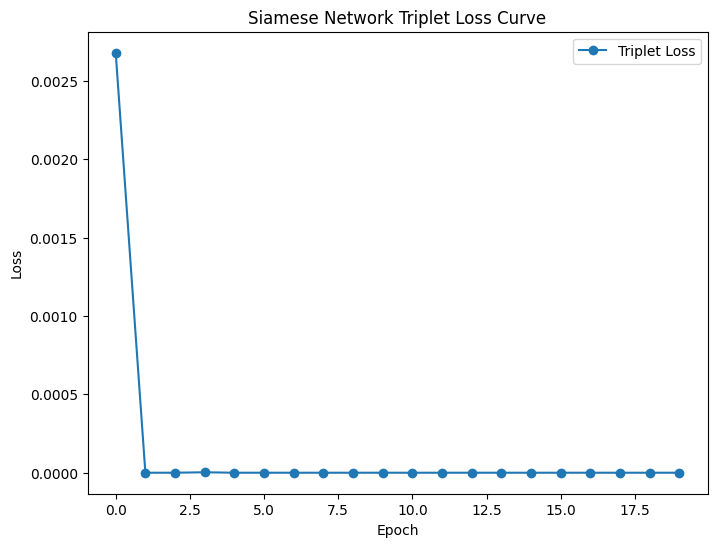

In [ ]:
# =====================================================
# 1. Triplet Loss Curve
# =====================================================

plt.figure(figsize=(8,6))
plt.plot(history_siamese.history['loss'], marker='o', label='Triplet Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.title('Siamese Network Triplet Loss Curve')
plt.legend()

plt.show()

In [ ]:
# =====================================================
# 2a. Sample Triplet Visualization
# =====================================================

(triplet_imgs, _) = next(triplet_generator(healthy_train, unhealthy_train, BATCH_SIZE))
anchor_imgs, positive_imgs, negative_imgs = triplet_imgs

n_samples = 3

# Display sample triplet images
plt.figure(figsize=(15, 5 * n_samples))

for i in range(n_samples):
    plt.subplot(n_samples, 3, i*3 + 1)
    plt.imshow(anchor_imgs[i])
    plt.title('Anchor')
    plt.axis('off')

    plt.subplot(n_samples, 3, i*3 + 2)
    plt.imshow(positive_imgs[i])
    plt.title('Positive')
    plt.axis('off')

    plt.subplot(n_samples, 3, i*3 + 3)
    plt.imshow(negative_imgs[i])
    plt.title('Negative')
    plt.axis('off')

plt.suptitle('Sample Triplets')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# -----------------------------------------------------
# Compute Euclidean Distances for these Samples
# -----------------------------------------------------

def euclidean_distance(a, b):

    return np.sqrt(np.sum((a - b)**2))

anchor_embed = siamese_embedding_model.predict(anchor_imgs[:n_samples])
positive_embed = siamese_embedding_model.predict(positive_imgs[:n_samples])
negative_embed = siamese_embedding_model.predict(negative_imgs[:n_samples])

for i in range(n_samples):
    d_ap = euclidean_distance(anchor_embed[i], positive_embed[i])
    d_an = euclidean_distance(anchor_embed[i], negative_embed[i])

    print(f"Triplet {i+1}: d_ap = {d_ap:.4f}, d_an = {d_an:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Triplet 1: d_ap = 0.9438, d_an = 0.9906
Triplet 2: d_ap = 0.8474, d_an = 1.0781
Triplet 3: d_ap = 0.9787, d_an = 0.9346


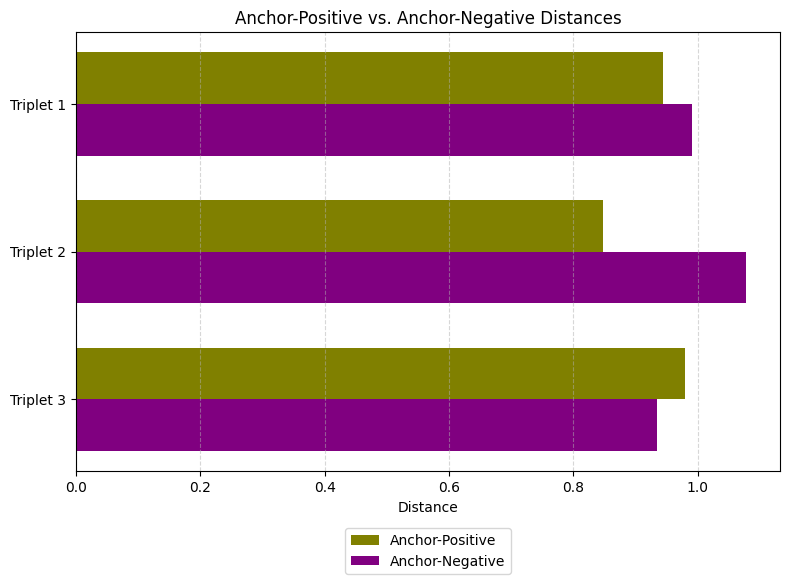

In [ ]:
# =====================================================
# 2b. Horizontal Histogram for the Distances -> One Bar Per Triplet
# =====================================================

labels = [f"Triplet {i+1}" for i in range(n_samples)]

d_ap_values = [euclidean_distance(anchor_embed[i], positive_embed[i]) for i in range(n_samples)]
d_an_values = [euclidean_distance(anchor_embed[i], negative_embed[i]) for i in range(n_samples)]

x = np.arange(n_samples)  # Indices for triplets
width = 0.35

plt.figure(figsize=(8, 6))

# Plot anchor-positive distances in olive
plt.barh(x - width/2, d_ap_values, height=width, color='olive', label='Anchor-Positive')

# Plot anchor-negative distances in purple
plt.barh(x + width/2, d_an_values, height=width, color='purple', label='Anchor-Negative')

# Configure y-axis ticks and labels, then invert y-axis so Triplet 1 is at the top
plt.yticks(x, labels)
plt.gca().invert_yaxis()

plt.xlabel("Distance")
plt.title("Anchor-Positive vs. Anchor-Negative Distances")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Place legend below the entire x-axis (adjust the offset as needed)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25))
plt.tight_layout()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━

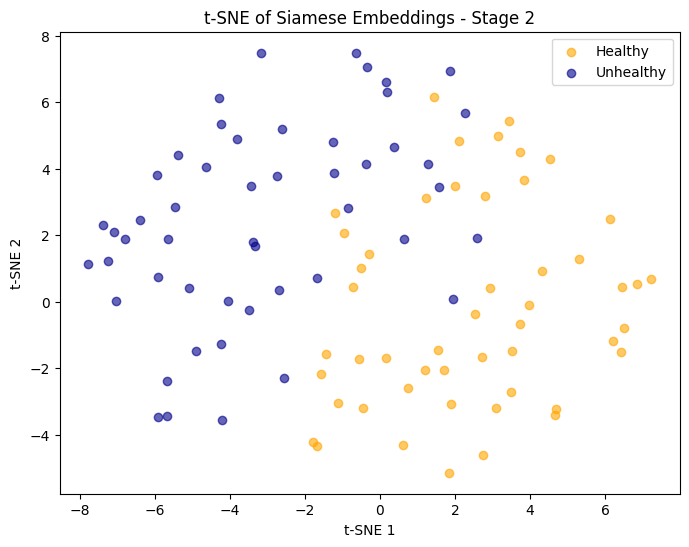

In [ ]:
# =====================================================
# 3. t-SNE Visualization of Siamese Embeddings
# =====================================================

sample_size = 100

healthy_sample = random.sample(get_image_paths(TRAIN2_DIR, 'healthy'), sample_size//2)
unhealthy_sample = random.sample(get_image_paths(TRAIN2_DIR, 'unhealthy'), sample_size//2)

sample_paths = healthy_sample + unhealthy_sample
siamese_embeddings = []

for path in sample_paths:
    img = safe_preprocess_image(path)

    if img is not None:
        img = np.expand_dims(img, axis=0)
        emb = siamese_embedding_model.predict(img)
        siamese_embeddings.append(emb[0])

siamese_embeddings = np.array(siamese_embeddings)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(siamese_embeddings)

plt.figure(figsize=(8,6))

plt.scatter(tsne_results[:sample_size//2, 0], tsne_results[:sample_size//2, 1],
            c='orange', label='Healthy', alpha=0.6)

plt.scatter(tsne_results[sample_size//2:, 0], tsne_results[sample_size//2:, 1],
            c='darkblue', label='Unhealthy', alpha=0.6)

plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

plt.title("t-SNE of Siamese Embeddings - Stage 2")
plt.legend()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 827ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


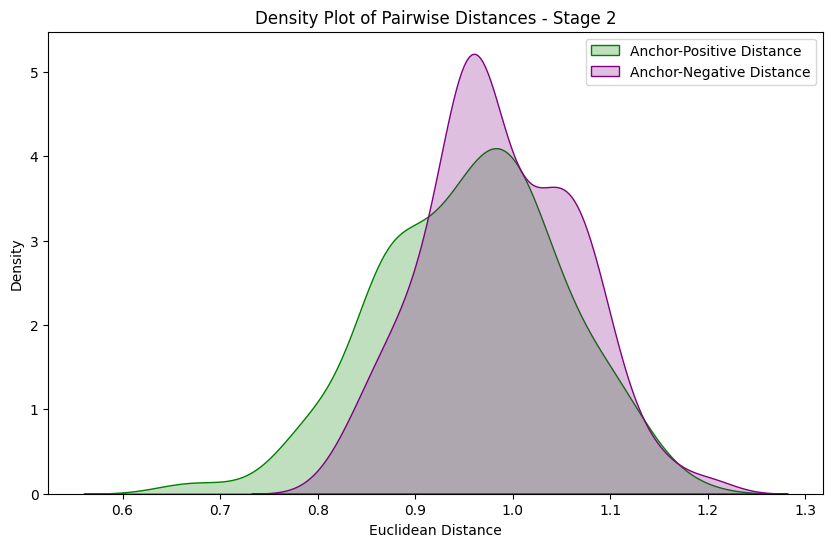

In [ ]:
# =====================================================
# 4. Density Plot of Pairwise Distances
# =====================================================

(triplet_imgs_large, _) = next(triplet_generator(healthy_train, unhealthy_train, 200))

anchor_imgs_large, positive_imgs_large, negative_imgs_large = triplet_imgs_large
anchor_embed_large = siamese_embedding_model.predict(anchor_imgs_large)

positive_embed_large = siamese_embedding_model.predict(positive_imgs_large)
negative_embed_large = siamese_embedding_model.predict(negative_imgs_large)

dist_ap = np.sqrt(np.sum((anchor_embed_large - positive_embed_large)**2, axis=1))
dist_an = np.sqrt(np.sum((anchor_embed_large - negative_embed_large)**2, axis=1))

plt.figure(figsize=(10,6))

sns.kdeplot(dist_ap, fill=True, label='Anchor-Positive Distance', color='green')
sns.kdeplot(dist_an, fill=True, label='Anchor-Negative Distance', color='purple')

plt.xlabel("Euclidean Distance")
plt.ylabel("Density")

plt.title("Density Plot of Pairwise Distances - Stage 2")
plt.legend()

plt.show()

## **(2) Hyperparameter-Tuning & Testing**
---
---

The Few-Shot Learning paradigm (FSL) is built from evolutionary processes and investigative developments from BLM (where key optimal hyperparameters were established) through the training of a Siamese Network using a metric learning loss function (providing a frozen embedding branch) to the final phases of the Few-Shot Learning Model (FSLM).

Several key implementations are used to build the necessary FSLM:

1. Generating episodic data to cater for the FSL environment, while operating under the 2-way 5-shot framework.

2. Construction of the hyperparameter-tuning binary classification model on top of the Siamese Network, and employing the Bayesian optimization search algorithm.

3. The recording and eventual evaluation of the FSLM performance through visualizations and tabulated metrics.

Hyperparameter-tuning the FSLM involves backpropagation, gradient descent, binary cross-entropy loss, and a softmax classifier, refining the model's architecture for optimal performance.

* The Softmax Classifier: The classifier will accompany the binary cross-entropy loss function.
$$\mathbb{P}_{ij} = \frac{e^{\Phi_{ij}}}{\sum^2_{K=1} e^{\Phi_{ik}} }$$

* The Binary Cross-Entropy (BCE) Loss Function: The binary cross-entropy loss function aids in the minimization of the difference between the predicted  probability $\mathbb{P}_{ij}$ and the label $Y_{ij}$.
$$\mathscr{L}_{BCE}= -\frac{1}{N}\sum^N_{i=1}\sum^C_{j=1}Y_{ij}\log\left(\mathbb{P}_{ij}) \right)$$

* Shannon Regularizer: This will be attached to the loss function in the hope that it will mitigate any overfitting issues as it penalizes large weights. The $\lambda_{\text{ Shan}}$ regularization parameter is one of the hyperparameters that will be hyperparameter-tuned.
$$\mathscr{L}_{\text{reg}} = \lambda_{\text{ Shan}} \frac{1}{N}\sum^N_{i=1} \sum^C_{j=1}\mathbb{P}_{ij}\log \left( \mathbb{P}_{ij} \right)$$

* The three components, $\color{purple}{\text{Softmax Classifier}}$, the $\color{green}{\text{Shannon Regularizer}}$ and the $\color{orange}{\text{BCE}}$ Loss Function will make-up the Total Loss Function $\mathscr{L}_{\text{Total}}$.

$$\boxed{\boxed{\begin{aligned}\mathscr{L}_{\text{Total}}&= \color{orange}{\mathscr{L}_{\text{BCE}}}+ \color{green}{\mathscr{L}_{\text{reg}}} \\ \\ &= \color{orange}{-\frac{1}{N}\sum^N_{i=1} \sum^C_{j=1} Y_{ij} \text{ log }(\color{purple}{\mathbb{P}_{ij}})} + \color{green}{\lambda_{\text{ Shan}} \frac{1}{N}\sum^N_{i=1}\sum^C_{j=1}\color{purple}{\mathbb{P}_{ij}}\log\left( \color{purple}{\mathbb{P}_{ij}} \right)}\end{aligned}}}$$


----
A brief description is given of the implemented code that make-up the key components of the construction of FSLM:

1. **Episodic Data Generation**

    * Sample Episode Display:

    This function develops one episode in line with the 2-way 5-shot framework, namely, both the support and query sets contains 5 images from both binary classes. To achieve this, the following description highlights the methods used:

        * Image Path Collection:

        The gathering of the file paths for the binary categories are placed in a list. This is possible by instigating a helper function: `get_image_paths`.

        * Support Set Sampling:

        By utilizing the integer division `//`, the number of categorical images are computed. Images are then randomly selected and assigned their respective labels: Healthy = 0 and Unhealthy = 1.

        * Query Set Sampling:

        The process is somewhat similar to the support set sampling. However, to enforce uniqueness within every set, the categorical images that have been selected for the support set are  excluded from the dataset.
    
    This function is called repeatedly by `generate_episodes` in order to acquire the maximum unique sets with the available data.

    * Developing Multiple Episodes:

    The function `generate_episodes` calls `sample_episode_display` for a prescribed number of episodes.

    `n_episodes=32` for the validation set.

    `n_episodes=16` for the test set.

    This essentially is aligned with the previous code that ensures uniqueness with no overlapping of data.

    Note: In order to gather the data for the hyperparameter-tuning and testing regimes, the episodes are collected into larger datasets:

        - `x_train_ft`, `y_train_ft` are concatenations from the support sets that has been One-Hot encoded.

        - ` x_val_ft`, `y_val_ft` are concatenations from the query sets that are associated from the same episode and is created to validate the hyperparameter-tuned model.

        - `x_test_ft`, `y_test_ft` are concatenations from the test episodes.

2. **Hyperparameter-Tuning Model (FSLM) with Bayesian Optimization**

    * Frozen Embedding:

    The input signal is passed through the model that was generated during the Siamese Network: `siamese_embedding_model` (now becomes a frozen embedding branch) and the output signal is a 128-dimensional embedding. A noteworthy remark; the weights and biases (structural parameters) are not updated during this phase.

    * Softmax Classifier & Custom Shannon Regularizer:

    The classifier is added on top together with a Shannon regularizer. The custom built regularizer is  operating similarly to the
$L_2$ regularizer that was implemented in Stage 1. It's primary operational objective is to penalize the network, conditioned on the Shannon entropy which ensures a certain amount of sparsity or distribution in the structural parameters. The controlling element is the coefficient
$\lambda_{\text{ Shan}}$ which governs the strength of the penalization.

    * Hyperparameters:

    The search space is defined by utilizing the Keras Tuner's API, i.e. the _hp_  object.

    The following hyperparameters are associated with the Shannon regularizer and the Bayesian optimization search algorithm:
    
        *  The Shannon coefficient encourages either more diversification or precision within the space of predictions:

        $\lambda_{\text{ Shan}} \in \( -10.0, -5.0, -1.0, 0.0, 0.01, 0.5 \)$

        * The smoothness and degree of flexibility within the Martérn kernel:

        $\xi \in (1.5, 2.5)$

        * The exploration/exploitation hyperparameter within the Expected Improvement:

        $\xi_{\mathbb{EI}} \in (0.0, 0.1, 0.5, 0.75, 1.0)$
    
    In order to refer to the $\xi$ and the $\xi_{\mathbb{EI}}$ hyperparameters at a later phase, they   are also stored as attributes of the model:
    `model.xi = xi` and `model.xi_ei = xi_ei`

    * Constructing the Bayesian Optimization

        * Tuner Configuration:
    
        10 trials (`max_trials=10`) will develop the validation accuracy (`objective='val_accuracy`) of various permutations from the three designated hyperparameters. The `tuner` stores these generated results in `'finetune_tuner_dir'`.

        * Search Execution:
    
        Due to the problems encounter to visualize the executed results, a callback system has been put in place to capture the metrics for each epoch per trial: `callbacks=[csv_logger]`, where `csv_logger = tf.keras.callbacks.CSVLogger(csv_filepath, separator=",", append=True)` records each trial in a sequential manner.

3. **Recording & Evaluation**

    * Logging:

    Each trial's results are logged at `all_trials_filepath = '... all_trial_history.csv'`. The information generated and recorded is `["trial_id", "hyperparameters", "best_val_accuracy"]`.

    Once completed, the permutated hyperparameters that attains the highest `"best_val_accuracy"` value is then implemented within the architecture of the FSLM, where it is subjected to the final evaluation on the test data.

    * Visualizations:

        * Plot Unified Loss & Accuracy Curves:

        The results of each trial from the training and validation phases are observed per epoch on one diagram for both the loss and accuracy. As there are 10 trials, 10 diagrams are generated with their respective observations.

        * Tabulated Global Metrics:

        The Accuracy, Precision, Recall, F1-Score and MCC metrics are documented for both the validation and test phases, cumulating in their respective confusion matrices.

        These associated results are shown in a histogram to give a visual perspective.

        * Hyperparameter Response Surface:

        The results from the various combinations of hyperparameters that were assessed during the 10 trials can be observed on a 3-dimensional graph. Each observation has their associated trial ID and colour coded in accordance to the value of validation accuracy in line with the heatmap.  
        

In [ ]:
# =====================================================
# Prepare Episodic Data for Few-Shot (2-way 5-shot)
# =====================================================

def sample_episode_display(root_dir, n_support=10, n_query=10):
    """
    Samples an episode from the given directory with two classes.
    For a 2-way 5-shot setting:
      - Support set: 10 images total (5 per class)
      - Query set: 10 images total (5 per class)
    """
    healthy = get_image_paths(root_dir, 'healthy')
    unhealthy = get_image_paths(root_dir, 'unhealthy')

    # For support, select half from each class (5 each if n_support=10)
    n_support_h = n_support // 2   # 5 images from healthy
    n_support_u = n_support - n_support_h  # 5 images from unhealthy

    support_h = random.sample(healthy, n_support_h)
    support_u = random.sample(unhealthy, n_support_u)
    support_paths = support_h + support_u

    # For query, select half from each class (avoiding those used in support)
    n_query_h = n_query // 2   # 5 images from healthy
    n_query_u = n_query - n_query_h   # 5 images from unhealthy

    query_h = random.sample(list(set(healthy) - set(support_h)), n_query_h)
    query_u = random.sample(list(set(unhealthy) - set(support_u)), n_query_u)
    query_paths = query_h + query_u

    # Labels: 0 for healthy, 1 for unhealthy
    support_labels = [0] * n_support_h + [1] * n_support_u
    query_labels = [0] * n_query_h + [1] * n_query_u

    support_images = np.array([safe_preprocess_image(p) for p in support_paths])
    query_images = np.array([safe_preprocess_image(p) for p in query_paths])

    return support_images, np.array(support_labels), query_images, np.array(query_labels)

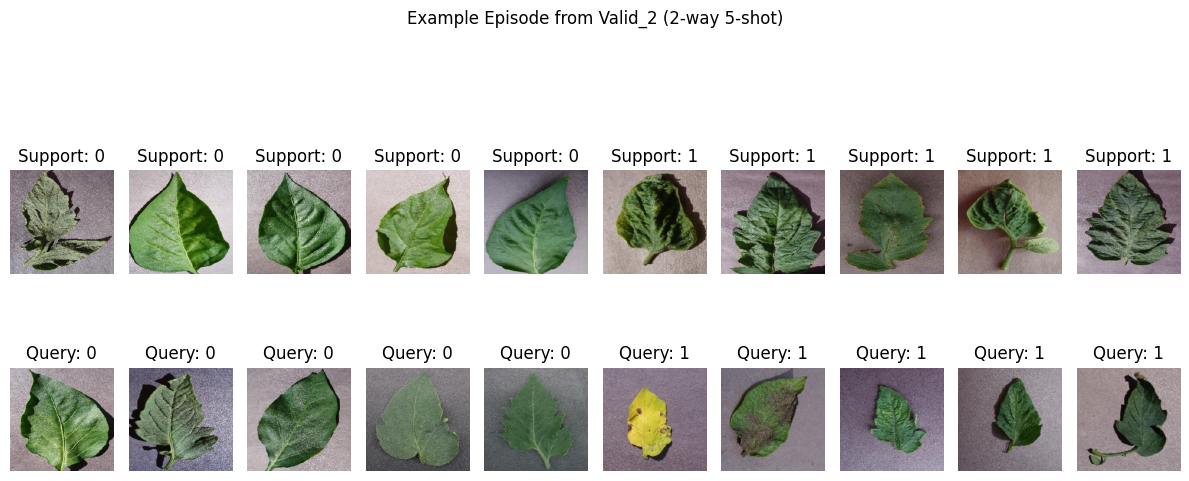

In [ ]:
# =====================================================
# Visual Example of a Support & Query Set (2-way 5-shot)
# =====================================================

# Sampling an episode with 10 support and 10 query images
supp_imgs, supp_labels, qry_imgs, qry_labels = sample_episode_display(VALID2_DIR, n_support=10, n_query=10)

plt.figure(figsize=(12,6))

# Display support images in the top row (10 images)
for i in range(len(supp_imgs)):
    plt.subplot(2, 10, i+1)
    plt.imshow(supp_imgs[i])
    plt.title(f"Support: {supp_labels[i]}")
    plt.axis('off')

# Display query images in the bottom row (10 images)
for i in range(len(qry_imgs)):
    plt.subplot(2, 10, 10 + i + 1)
    plt.imshow(qry_imgs[i])
    plt.title(f"Query: {qry_labels[i]}")
    plt.axis('off')

plt.suptitle("Example Episode from Valid_2 (2-way 5-shot)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
# =====================================================
# Prepare Episodic Few-Shot Data for Hyperparameter-Tuning & Test
# =====================================================

def generate_episodes(root_dir, n_episodes, n_support=10, n_query=10):
    """
    Generate a list of episodes.
    For non-overlapping episodes, you might limit n_episodes based on available data.
    """
    episodes = []

    for _ in range(n_episodes):
        episodes.append(sample_episode_display(root_dir, n_support, n_query))

    return episodes

In [ ]:
# -----------------------------------------------------
# Generate Episodes
# -----------------------------------------------------

# Validation set -> valid_2 (2-way 5-shot, 32 episodes)
valid_episodes = generate_episodes(VALID2_DIR, n_episodes=32, n_support=10, n_query=10)

x_train_ft = np.concatenate([ep[0] for ep in valid_episodes])
y_train_ft = tf.keras.utils.to_categorical(np.concatenate([ep[1] for ep in valid_episodes]), num_classes=2)

x_val_ft = np.concatenate([ep[2] for ep in valid_episodes])
y_val_ft = tf.keras.utils.to_categorical(np.concatenate([ep[3] for ep in valid_episodes]), num_classes=2)

# Test set -> test_2 (2-way 5-shot, 16 episodes)
test_episodes = generate_episodes(TEST2_DIR, n_episodes=16, n_support=10, n_query=10)

x_test_ft = np.concatenate([ep[2] for ep in test_episodes])
y_test_ft = tf.keras.utils.to_categorical(np.concatenate([ep[3] for ep in test_episodes]), num_classes=2)

In [ ]:
# -----------------------------------------------------
# Setup CSV Logging for Hyperparameter-Tuning Metrics
# -----------------------------------------------------

csv_filepath = '/content/drive/My Drive/finetune_history.csv'
csv_logger = tf.keras.callbacks.CSVLogger(csv_filepath, separator=",", append=True)

In [ ]:
# =====================================================
# Build Hyperparameter-Tuning Model with Bayesian Optimization
# =====================================================

# The frozen siamese_embedding_model (from Stage 1) is used here and a Softmax
# classifier is bolted on top.
# Hyperparameter-tune only:
#   - lambda_shan (Shannon regularizer coefficient)
#   - xi (Martérn kernel parameter)
#   - xi_ei (Expected Improvement parameter)

# -----------------------------------------------------
# Define a Custom Shannon Regularizer
# -----------------------------------------------------

class ShannonRegularizer(regularizers.Regularizer):

    def __init__(self, lambda_shan):
        self.lambda_shan = lambda_shan

    def __call__(self, x):
        abs_x = K.abs(x)
        sum_x = K.sum(abs_x)
        p = abs_x / (sum_x + K.epsilon())
        entropy = -K.sum(p * K.log(p + K.epsilon()))

        return self.lambda_shan * entropy

    def get_config(self):

        return {'lambda_shan': self.lambda_shan}

# -----------------------------------------------------
# Build the Hyperparameter-Tuning Model on Top of the Frozen Embedding Branch
# -----------------------------------------------------

def build_finetune_model(hp):

    lambda_shan_val = hp.Choice('lambda_shan', values=[-10.0, -5.0, -1.0, 0.0, 0.01, 0.5])
    xi = hp.Choice('xi', values=[1.5, 2.5])
    xi_ei = hp.Choice('xi_ei', values=[0.0, 0.1, 0.5, 0.75, 1.0])

    inp = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    emb = siamese_embedding_model(inp)  # Frozen embedding branch
    out = tf.keras.layers.Dense(2,
                                activation='softmax',
                                kernel_regularizer=ShannonRegularizer(lambda_shan=lambda_shan_val)
                               )(emb)

    model = tf.keras.models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.xi = xi
    model.xi_ei = xi_ei

    return model

### Execution

In [ ]:
# -----------------------------------------------------
# Setup the Bayesian Tuner using Keras Tuner
# -----------------------------------------------------

# Setup the Bayesian Tuner using Keras Tuner
tuner = kt.BayesianOptimization(
    build_finetune_model,
    objective='val_accuracy',
    max_trials=10,
    directory='finetune_tuner_dir',
    project_name='fslm_finetune'
)

In [ ]:
# =====================================================
# Hyperparameter-Tuning Data
# =====================================================

#   - x_train_ft,   y_train_ft
#   - x_val_ft,     y_val_ft
#   - x_test_ft,    y_test_ft


# Run tuner search with both the CSV logger and evaluation callback
tuner.search(x_train_ft, y_train_ft,
             epochs=EPOCHS_FINE,
             validation_data=(x_val_ft, y_val_ft),
             callbacks=[csv_logger])

# Retrieve and save the best hyperparameter-tuned model
best_finetune_model = tuner.get_best_models(num_models=1)[0]
best_finetune_model.save('/content/drive/My Drive/FSLM.keras')

print("Fine-tuned model saved as FSLM.keras")

# Retrieve and log the best hyperparameters from the tuner oracle
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
best_hps = best_trial.hyperparameters.values
best_val_accuracy = best_trial.metrics.get_best_value("val_accuracy")

print("\nBest Hyperparameters:")

for hp_name, hp_value in best_hps.items():
    print(f"  {hp_name}: {hp_value}")

print(f"\nBest Validation Accuracy: {best_val_accuracy:.4f}")

Trial 10 Complete [00h 00m 52s]
val_accuracy: 0.956250011920929

Best val_accuracy So Far: 0.996874988079071
Total elapsed time: 00h 08m 42s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 322 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Fine-tuned model saved as FSLM.keras

Best Hyperparameters:
  lambda_shan: 0.0
  xi: 2.5
  xi_ei: 0.75

Best Validation Accuracy: 0.9969


In [ ]:
# =====================================================
# Custom Logging of All Tuner Trials to CSV
# =====================================================

# After tuner.search(), extract all trial information and write to a CSV file.
all_trials_filepath = '/content/drive/My Drive/all_trial_history.csv'
trials = tuner.oracle.trials  # Access the trials via the attribute

with open(all_trials_filepath, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["trial_id", "hyperparameters", "best_val_accuracy"])

    for trial in trials.values():
        writer.writerow([trial.trial_id,
                         trial.hyperparameters.values,
                         trial.metrics.get_best_value("val_accuracy")])

print(f"All trial results logged to {all_trials_filepath}")

All trial results logged to /content/drive/My Drive/all_trial_history.csv


In [ ]:
# =====================================================
# Final Evaluation on Test Set
# =====================================================

test_results = best_finetune_model.evaluate(x_test_ft, y_test_ft, verbose=2)
print("Final Test Evaluation Results:", test_results)

# Predict probabilities on the test set
test_probs = best_finetune_model.predict(x_test_ft)
test_true = np.argmax(y_test_ft, axis=1)
test_preds = np.argmax(test_probs, axis=1)

cm = confusion_matrix(test_true, test_preds)
acc = accuracy_score(test_true, test_preds)
prec = precision_score(test_true, test_preds, zero_division=0)
rec = recall_score(test_true, test_preds, zero_division=0)
f1 = f1_score(test_true, test_preds, zero_division=0)
mcc = matthews_corrcoef(test_true, test_preds)

print("\nFinal Test Set Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")

5/5 - 4s - 765ms/step - accuracy: 0.9875 - loss: 0.1747
Final Test Evaluation Results: [0.17465656995773315, 0.987500011920929]
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step

Final Test Set Confusion Matrix:
[[80  0]
 [ 2 78]]
Accuracy: 0.9875
Precision: 1.0000
Recall: 0.9750
F1-Score: 0.9873
MCC: 0.9753


#### Visualizations

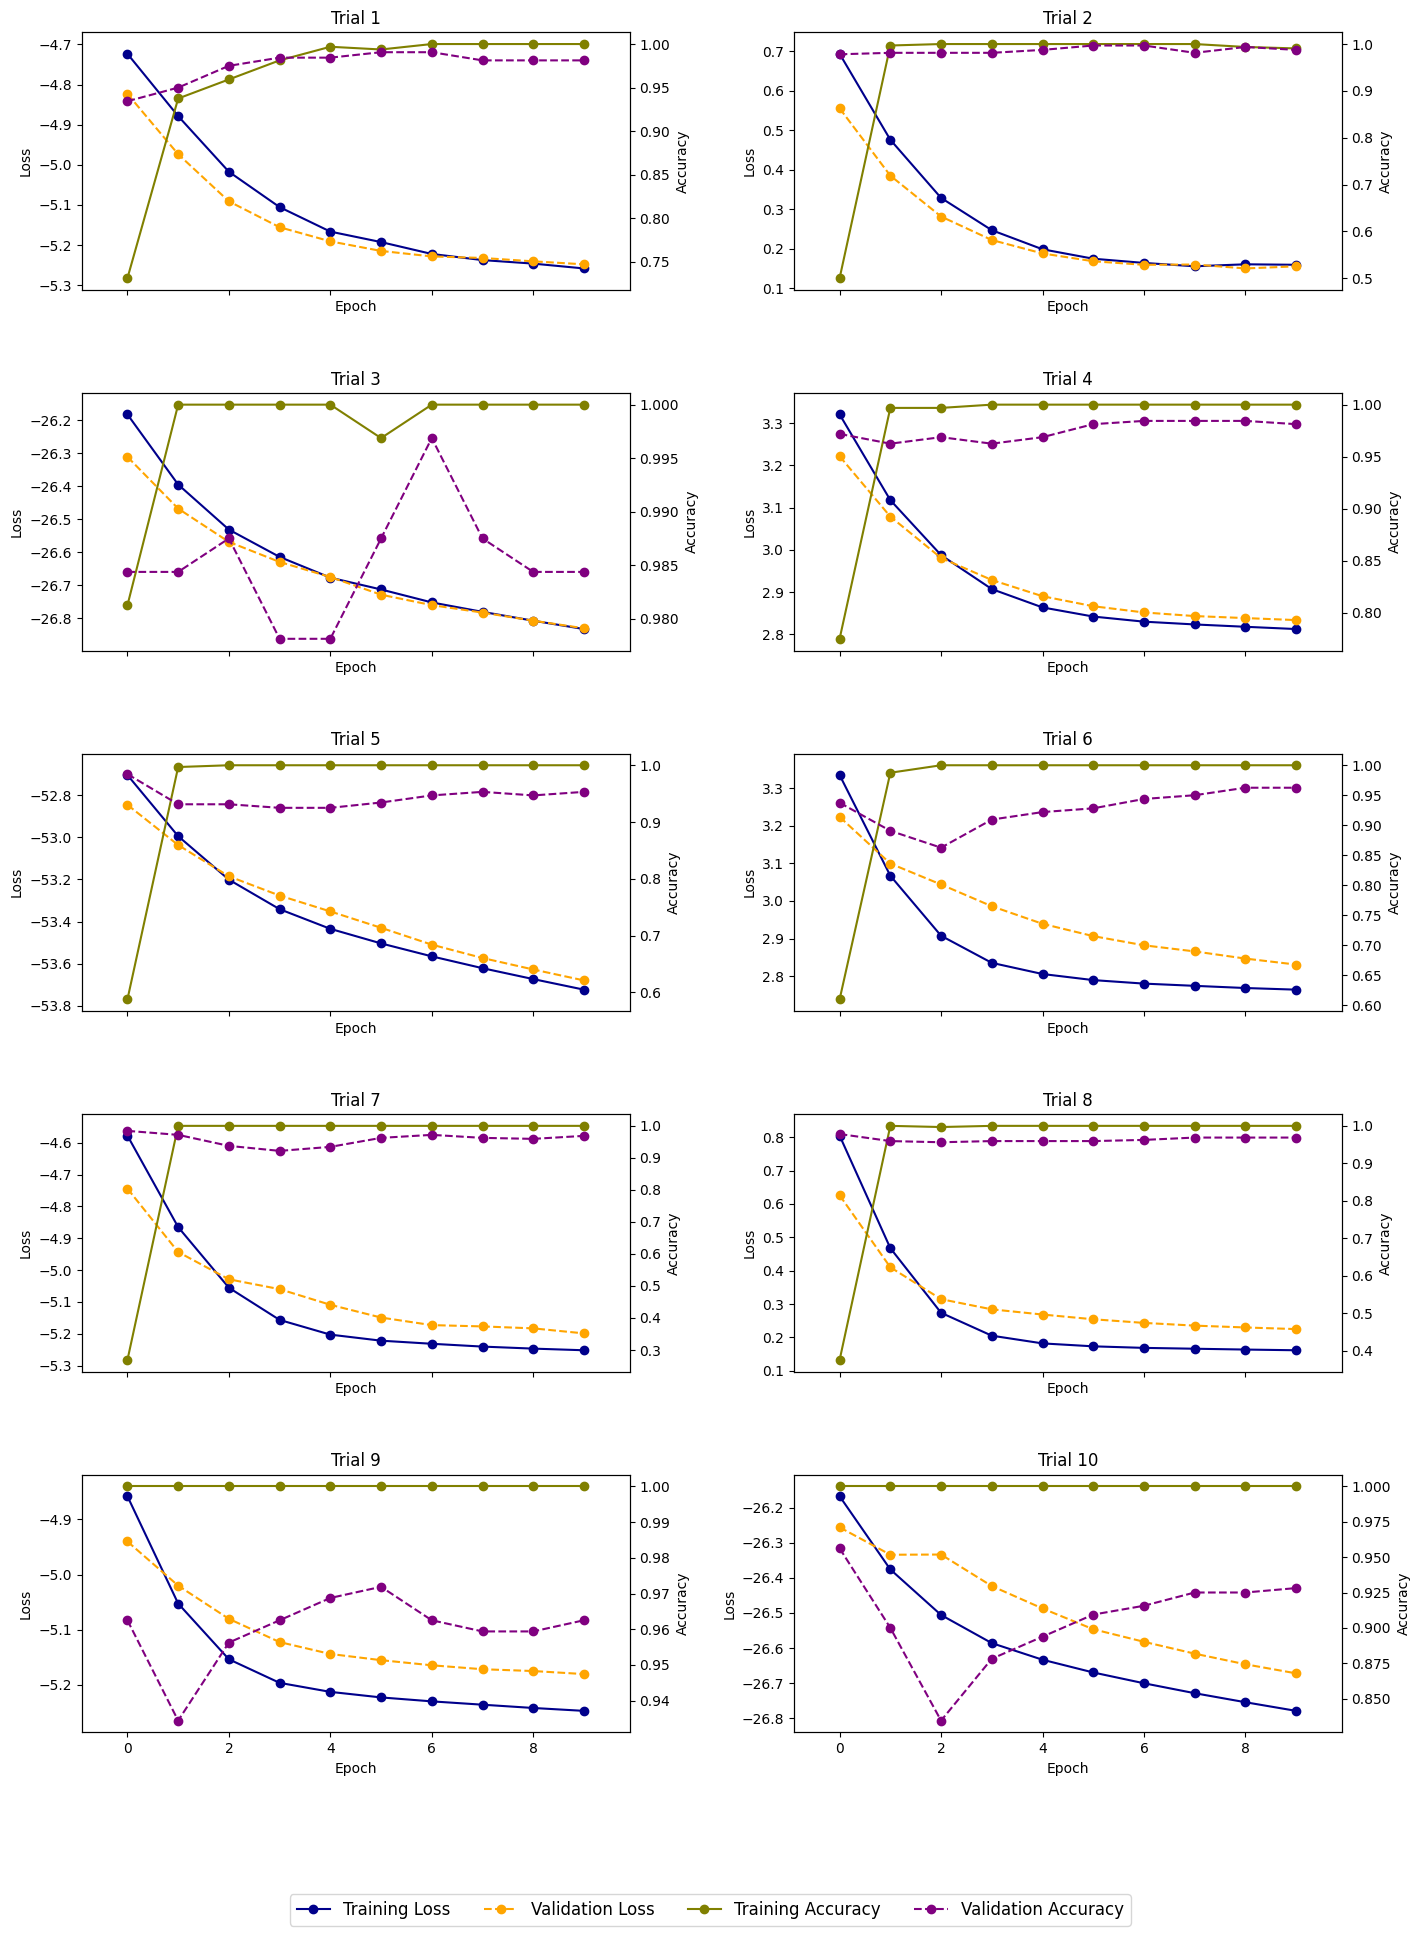

In [ ]:
# =====================================================
# Plot Loss & Accuracy Curves for All Trials
# =====================================================

# Load the hyperparameter-tuning history CSV file
csv_path = '/content/drive/My Drive/finetune_history.csv'
df_history = pd.read_csv(csv_path)

# Create 'trial_id' -> 10 epochs per trial
if 'trial_id' not in df_history.columns:
    df_history['trial_id'] = ((df_history.index // 10) + 1).astype(str)

# Get the sorted unique trial IDs
unique_trials = sorted(df_history['trial_id'].unique(), key=lambda x: int(x))
n_trials = len(unique_trials)

# Define grid layout: 2 columns per row (so for 10 trials, 5 rows)
n_cols = 2
n_rows = (n_trials + n_cols - 1) // n_cols

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 20), sharex=True)
axes = axes.flatten()

# Loop over each trial
for i, trial in enumerate(unique_trials):
    trial_data = df_history[df_history['trial_id'] == trial]
    ax = axes[i]

    # Set tick parameters for x and y axes in black
    ax.tick_params(axis='both', colors='black')
    for spine in ax.spines.values():
        spine.set_color('black')

    # Plot Loss on left y-axis
    ax.plot(trial_data['epoch'], trial_data['loss'], marker='o', linestyle='-', color='darkblue', label='Training Loss')
    ax.plot(trial_data['epoch'], trial_data['val_loss'], marker='o', linestyle='--', color='orange', label='Validation Loss')
    ax.set_xlabel("Epoch", color='black')
    ax.set_ylabel("Loss", color='black')
    ax.tick_params(axis='y', labelcolor='black')

    # Create twin axis for Accuracy
    ax2 = ax.twinx()
    ax2.plot(trial_data['epoch'], trial_data['accuracy'], marker='o', linestyle='-', color='olive', label='Training Accuracy')
    ax2.plot(trial_data['epoch'], trial_data['val_accuracy'], marker='o', linestyle='--', color='purple', label='Validation Accuracy')
    ax2.set_ylabel("Accuracy", color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    for spine in ax2.spines.values():
        spine.set_color('black')

    # Title each subplot with the trial ID (now starting at 1)
    ax.set_title(f"Trial {trial}", color='black', fontsize=12)

    # Increase padding inside each subplot
    ax.margins(x=0.1, y=0.1)

# Remove any extra subplots if grid size > n_trials
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create a single consolidated legend for the entire figure
handle_train_loss = mlines.Line2D([], [], color='darkblue', marker='o', linestyle='-', label='Training Loss')
handle_val_loss = mlines.Line2D([], [], color='orange', marker='o', linestyle='--', label='Validation Loss')
handle_train_acc = mlines.Line2D([], [], color='olive', marker='o', linestyle='-', label='Training Accuracy')
handle_val_acc = mlines.Line2D([], [], color='purple', marker='o', linestyle='--', label='Validation Accuracy')

fig.legend(handles=[handle_train_loss, handle_val_loss, handle_train_acc, handle_val_acc],
           loc='lower center', ncol=4, frameon=True, fontsize=12)

plt.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.3, hspace=0.4)
plt.show()

In [ ]:
# =====================================================
# Tabulated Global Metrics -> Validation & Test
# =====================================================

def compute_global_metrics(model, x, y):
    """
    Compute global metrics for a given model on input data x and labels y.
    Assumes that y is one-hot encoded and model.predict returns class probabilities.
    """
    # Predict probabilities and convert predictions and true labels to class indices
    probs = model.predict(x)
    true_labels = np.argmax(y, axis=1)
    pred_labels = np.argmax(probs, axis=1)

    # Compute confusion matrix and key metrics
    cm = confusion_matrix(true_labels, pred_labels)
    acc = accuracy_score(true_labels, pred_labels)
    prec = precision_score(true_labels, pred_labels, zero_division=0)
    rec = recall_score(true_labels, pred_labels, zero_division=0)
    f1 = f1_score(true_labels, pred_labels, zero_division=0)
    mcc = matthews_corrcoef(true_labels, pred_labels)

    return cm, acc, prec, rec, f1, mcc

# Compute metrics on the validation set
cm_val, acc_val, prec_val, rec_val, f1_val, mcc_val = compute_global_metrics(best_finetune_model, x_val_ft, y_val_ft)

# Compute metrics on the test set
cm_test, acc_test, prec_test, rec_test, f1_test, mcc_test = compute_global_metrics(best_finetune_model, x_test_ft, y_test_ft)

# Create DataFrames to tabulate the metrics
df_val_metrics = pd.DataFrame({
    'Set': ['Validation'],
    'Accuracy': [acc_val],
    'Precision': [prec_val],
    'Recall': [rec_val],
    'F1-Score': [f1_val],
    'MCC': [mcc_val]
})

df_test_metrics = pd.DataFrame({
    'Set': ['Test'],
    'Accuracy': [acc_test],
    'Precision': [prec_test],
    'Recall': [rec_test],
    'F1-Score': [f1_test],
    'MCC': [mcc_test]
})

print("Global Validation Metrics:")
print(df_val_metrics.to_string(index=False))
print("\nGlobal Test Metrics:")
print(df_test_metrics.to_string(index=False))

print("\nValidation Set Confusion Matrix:")
print(cm_val)
print("\nTest Set Confusion Matrix:")
print(cm_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Global Validation Metrics:
       Set  Accuracy  Precision  Recall  F1-Score      MCC
Validation  0.996875   0.993789     1.0  0.996885 0.993769

Global Test Metrics:
 Set  Accuracy  Precision  Recall  F1-Score      MCC
Test    0.9875        1.0   0.975  0.987342 0.975305

Validation Set Confusion Matrix:
[[159   1]
 [  0 160]]

Test Set Confusion Matrix:
[[80  0]
 [ 2 78]]


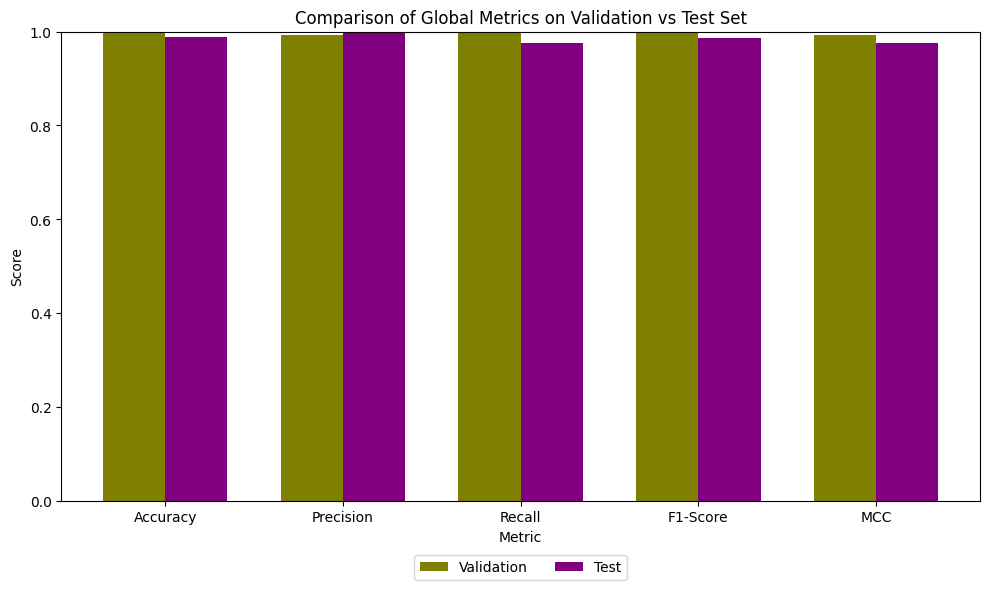

In [ ]:
# DataFrames:
df_val_metrics = pd.DataFrame({
    'Set': ['Validation'],
    'Accuracy': [acc_val],
    'Precision': [prec_val],
    'Recall': [rec_val],
    'F1-Score': [f1_val],
    'MCC': [mcc_val]
})

df_test_metrics = pd.DataFrame({
    'Set': ['Test'],
    'Accuracy': [acc_test],
    'Precision': [prec_test],
    'Recall': [rec_test],
    'F1-Score': [f1_test],
    'MCC': [mcc_test]
})

# Combine the two DataFrames into one for plotting
df_combined = pd.concat([df_val_metrics, df_test_metrics], ignore_index=True)
df_combined = df_combined.set_index('Set')

# Define the metrics and create an x-axis for them
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MCC']
x = np.arange(len(metrics))  # Positions for the metrics on the x-axis
width = 0.35  # Width of each bar

# Extract the values for each set
val_values = df_combined.loc['Validation', metrics].values.astype(float)
test_values = df_combined.loc['Test', metrics].values.astype(float)

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars_val = ax.bar(x - width/2, val_values, width, label='Validation', color='olive')
bars_test = ax.bar(x + width/2, test_values, width, label='Test', color='purple')

# Set labels, title, and x-tick labels
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Global Metrics on Validation vs Test Set')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Adjust y-axis to [0, 1]
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

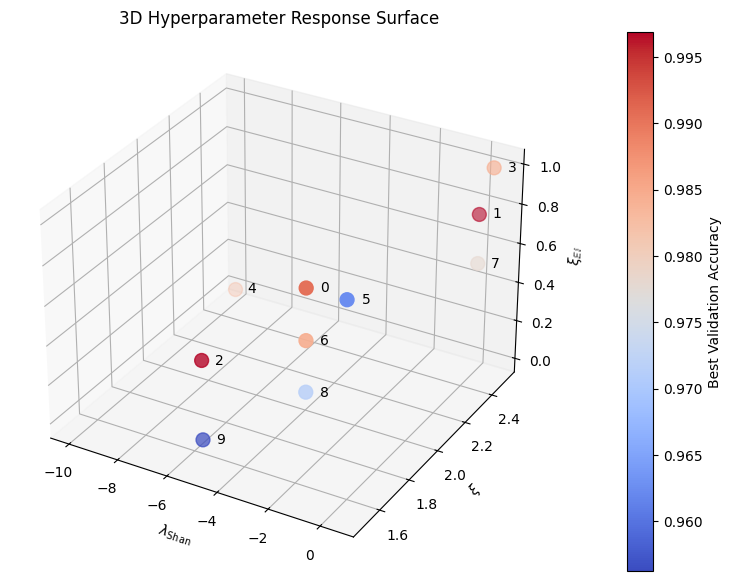

In [ ]:
# =====================================================
# Hyperparameter Response Surface
# =====================================================

# -----------------------------------------------------
# Load and Parse the CSV
# -----------------------------------------------------

csv_path = '/content/drive/My Drive/all_trial_history.csv'
df = pd.read_csv(csv_path)

# Create lists to store the hyperparameter values and metrics
trial_ids = []
lambda_shan_vals = []
xi_vals = []
xi_ei_vals = []
best_val_accs = []

for i, row in df.iterrows():
    trial_id = row['trial_id']
    best_val_acc = row['best_val_accuracy']
    hyper_str = row['hyperparameters']
    hyper_dict = ast.literal_eval(hyper_str)

    lambda_shan = hyper_dict['lambda_shan']
    xi = hyper_dict['xi']
    xi_ei = hyper_dict['xi_ei']

    trial_ids.append(trial_id)
    best_val_accs.append(best_val_acc)
    lambda_shan_vals.append(lambda_shan)
    xi_vals.append(xi)
    xi_ei_vals.append(xi_ei)

# -----------------------------------------------------
# Plot a 3D Scatter Plot with shifted labels
# -----------------------------------------------------

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D, color by best_val_accuracy using coolwarm colormap
scatter = ax.scatter(lambda_shan_vals, xi_vals, xi_ei_vals,
                     c=best_val_accs, cmap='coolwarm', s=100)

# Add colorbar for best_val_accuracy
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Best Validation Accuracy')

# Define an offset for the x-coordinate (adjust as needed)
offset = (max(lambda_shan_vals) - min(lambda_shan_vals)) * 0.05

# Label each point with the trial_id, shifted to the right by the offset
for i in range(len(trial_ids)):
    ax.text(lambda_shan_vals[i] + offset,
            xi_vals[i],
            xi_ei_vals[i],
            f"{trial_ids[i]}",
            size=10,
            zorder=1,
            color='black')

# Use LaTeX-style labels for the axes
ax.set_xlabel(r'$\lambda_{\mathrm{Shan}}$')
ax.set_ylabel(r'$\xi$')
ax.set_zlabel(r'$\xi_{\mathbb{EI}}$')
ax.set_title('3D Hyperparameter Response Surface')

plt.show()

In [ ]:
# Download finetune_history.csv
files.download('/content/drive/My Drive/finetune_history.csv')

# Download all_trial_history.csv
files.download('/content/drive/My Drive/all_trial_history.csv')

## (3) Post Analysis Requirements

In [ ]:
# -----------------------------------------------------
# Importing the Libraries & Mounting Google Drive
# -----------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import csv
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


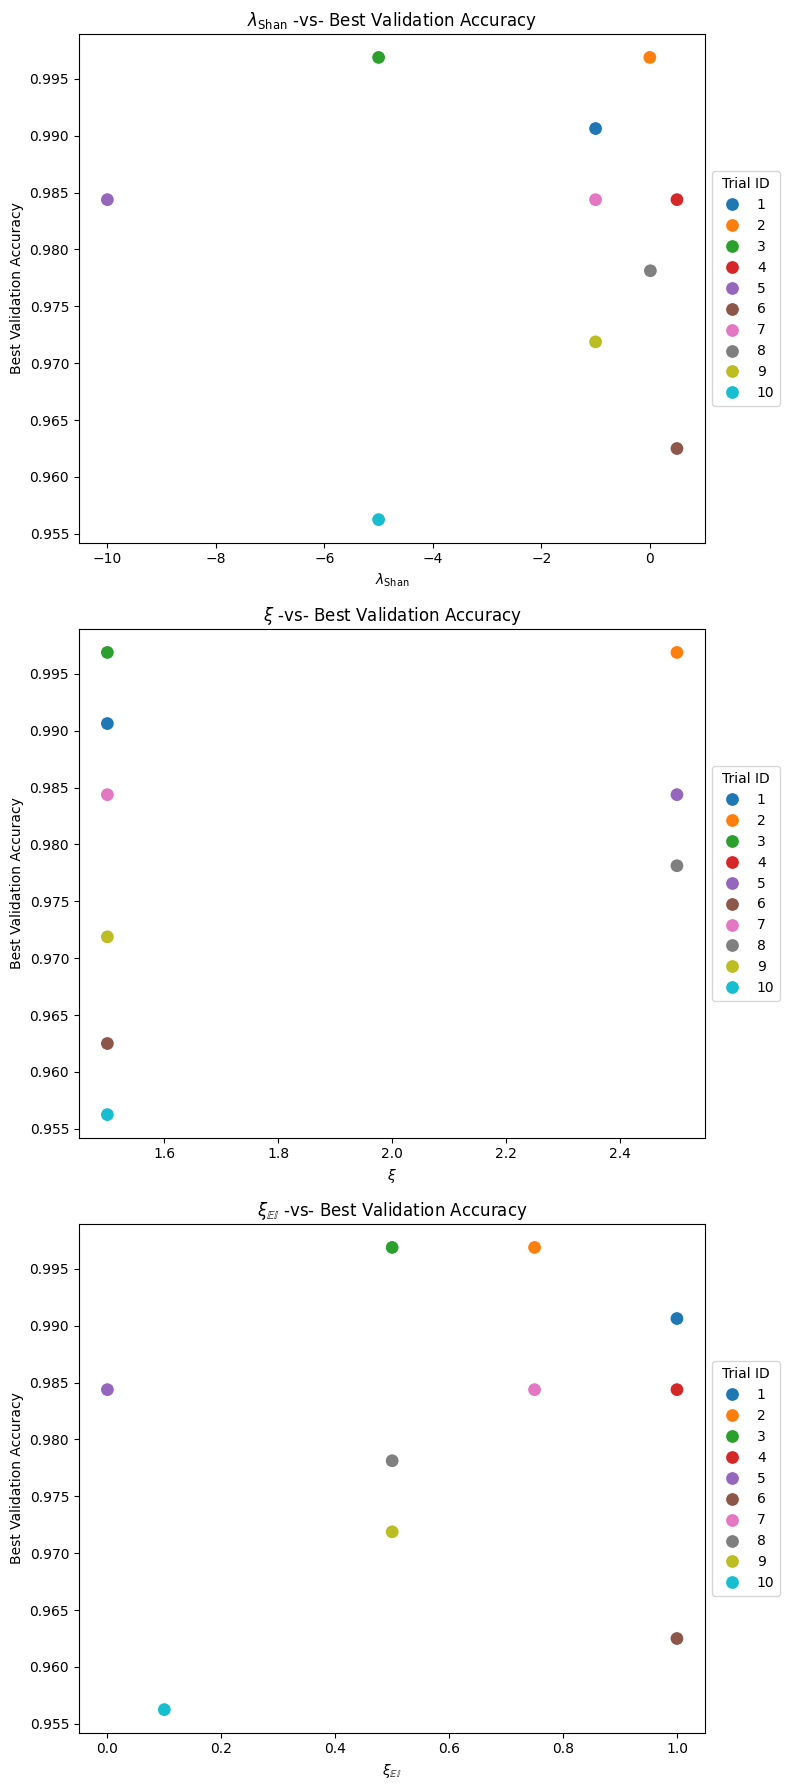

In [ ]:
# =====================================================
# Hyperparameters -vs- Best Validation Accuracy
# =====================================================

# Load the trial data CSV
df_trials = pd.read_csv('/content/drive/My Drive/all_trial_history.csv')

# Convert trial_id to integer and shift from 0–9 to 1–10
df_trials['trial_id'] = df_trials['trial_id'].astype(int) + 1

# Extract hyperparameters into separate columns using ast.literal_eval
df_trials['lambda_shan'] = df_trials['hyperparameters'].apply(
    lambda x: ast.literal_eval(x).get('λ_Shan', ast.literal_eval(x).get('lambda_shan'))
)

df_trials['xi'] = df_trials['hyperparameters'].apply(
    lambda x: ast.literal_eval(x).get('ξ', ast.literal_eval(x).get('xi'))
)

df_trials['xi_ei'] = df_trials['hyperparameters'].apply(
    lambda x: ast.literal_eval(x).get('ξ_EI', ast.literal_eval(x).get('xi_ei'))
)

# Create a figure with 3 rows and 1 column
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))

# -----------------------------------------------------
# Plot 1: λ_Shan -vs- Best Validation Accuracy
# -----------------------------------------------------

sns.scatterplot(
    data=df_trials, x='lambda_shan', y='best_val_accuracy',
    hue='trial_id', palette='tab10', s=100, ax=axs[0]
)

axs[0].set_title(r'$\lambda_{\mathrm{Shan}}$ -vs- Best Validation Accuracy')
axs[0].set_xlabel(r'$\lambda_{\mathrm{Shan}}$')
axs[0].set_ylabel('Best Validation Accuracy')

legend_0 = axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Trial ID')

# -----------------------------------------------------
# Plot 2: ξ vs Best Validation Accuracy
# -----------------------------------------------------

sns.scatterplot(
    data=df_trials, x='xi', y='best_val_accuracy',
    hue='trial_id', palette='tab10', s=100, ax=axs[1]
)

axs[1].set_title(r'$\xi$ -vs- Best Validation Accuracy')
axs[1].set_xlabel(r'$\xi$')
axs[1].set_ylabel('Best Validation Accuracy')

legend_1 = axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Trial ID')

# -----------------------------------------------------
# Plot 3: ξ_EI vs Best Validation Accuracy
# -----------------------------------------------------

sns.scatterplot(
    data=df_trials, x='xi_ei', y='best_val_accuracy',
    hue='trial_id', palette='tab10', s=100, ax=axs[2]
)

axs[2].set_title(r'$\xi_{\mathbb{EI}}$ -vs- Best Validation Accuracy')
axs[2].set_xlabel(r'$\xi_{\mathbb{EI}}$')
axs[2].set_ylabel('Best Validation Accuracy')

legend_2 = axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Trial ID')

plt.tight_layout()
plt.show()

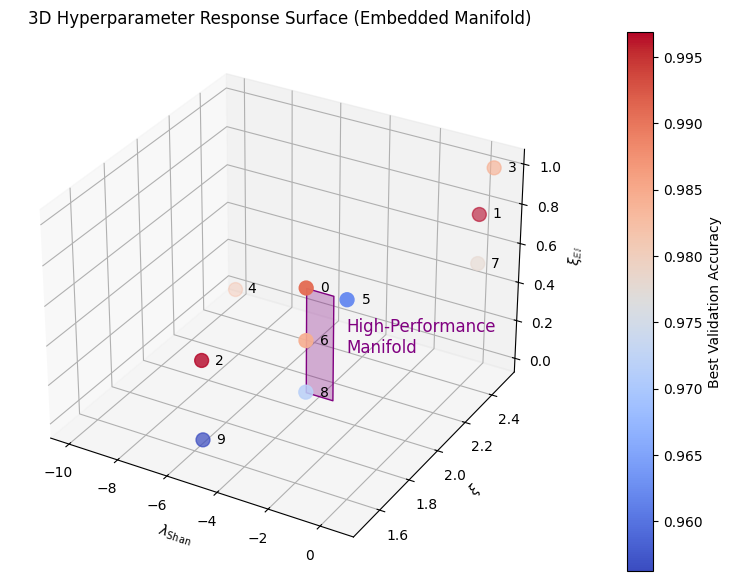

In [ ]:
# =====================================================
# Optimal Hyperparameter Manifold Embedded in the Hyperparameter Response Surface
# =====================================================

# -----------------------------------------------------
# Load and Parse the CSV
# -----------------------------------------------------
csv_path = '/content/drive/My Drive/all_trial_history.csv'
df = pd.read_csv(csv_path)

# Create lists to store hyperparameter values and metrics
trial_ids = []
lambda_shan_vals = []
xi_vals = []
xi_ei_vals = []
best_val_accs = []

for i, row in df.iterrows():
    trial_id = row['trial_id']
    best_val_acc = row['best_val_accuracy']

    # Parse the hyperparameters column
    hyper_str = row['hyperparameters']
    hyper_dict = ast.literal_eval(hyper_str)

    lambda_shan = hyper_dict['lambda_shan']
    xi = hyper_dict['xi']
    xi_ei = hyper_dict['xi_ei']

    trial_ids.append(trial_id)
    best_val_accs.append(best_val_acc)
    lambda_shan_vals.append(lambda_shan)
    xi_vals.append(xi)
    xi_ei_vals.append(xi_ei)

# -----------------------------------------------------
# Create the 3D Scatter Plot
# -----------------------------------------------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D, colour by best_val_acc
scatter = ax.scatter(
    lambda_shan_vals,
    xi_vals,
    xi_ei_vals,
    c=best_val_accs,
    cmap='coolwarm',
    s=100
)

# Colour bar for best validation accuracy
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Best Validation Accuracy')

# Offset for labeling points
offset = (max(lambda_shan_vals) - min(lambda_shan_vals)) * 0.05

# Label each point with the trial_id
for i in range(len(trial_ids)):
    ax.text(
        lambda_shan_vals[i] + offset,
        xi_vals[i],
        xi_ei_vals[i],
        f"{trial_ids[i]}",
        size=10,
        color='black'
    )

# Axis labels and title
ax.set_xlabel(r'$\lambda_{\mathrm{Shan}}$')
ax.set_ylabel(r'$\xi$')
ax.set_zlabel(r'$\xi_{\mathbb{EI}}$')
ax.set_title('3D Hyperparameter Response Surface (Embedded Manifold)')

# -----------------------------------------------------
# Add a Filled Rectangle to Highlight a Region
# -----------------------------------------------------

# Define the corners for the region:
#   λ_Shan ∈ [-1.0, 0.0]
#   ξ = 1.5
#   ξ_EI ∈ [0.5, 1.0]
# The correct order is (lambda_shan, xi, xi_ei).

corners = np.array([
    [-1.0, 1.5, 0.5],
    [-1.0, 1.5, 1.0],
    [ 0.0, 1.5, 1.0],
    [ 0.0, 1.5, 0.5]
])

# Create a Poly3DCollection for these corners
verts = [corners]
poly = Poly3DCollection(verts, alpha=0.3, facecolors='purple', edgecolors='purple')
ax.add_collection3d(poly)

# Label the manifold region in 3D
ax.text(0.5, 1.5, 0.75, "High-Performance\nManifold", color='purple', size=12)

# Adjust the viewing angle
ax.view_init(elev=30, azim=-60)

plt.show()